In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import warnings
import sklearn
import seaborn as sns
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


## 1. What areas have the most influence on revenue?

In [3]:
def parse_countries(production_countries):
    load_countries = json.loads(production_countries)
    countries = []
    for country in load_countries:
        countries.append(country["iso_3166_1"])
    return countries

In [5]:
df_movies = pd.read_csv("tmdb_5000_movies.csv")
print(df_movies.columns)
df_movies.head(1)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


#### PREPROCESS DATA
* *Parse country code and country name to country*
* *Remove rows have empty country data and 0 revenue 
    => (Since 0 in revenue may result in incollectible data so consider as noise)*

In [6]:
df_movies_revenue_by_countries = df_movies[["production_countries","revenue"]]
# remove empty info row
df_movies_revenue_by_countries.replace(['[]','',0], np.nan, inplace=True)
df_movies_revenue_by_countries.dropna(inplace=True)

df_movies_revenue_by_countries["countries"] = df_movies["production_countries"].apply(lambda x:parse_countries(x))
df_movies_revenue_by_countries.head(3)

,production_countries,revenue,countries
0,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2.787965e+09,"[US, GB]"
1,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",9.610000e+08,[US]
2,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",8.806746e+08,"[GB, US]"


In [7]:
countries_list = (",".join([",".join(x) for x in df_movies_revenue_by_countries["countries"]])).split(",")
countries_list = list(dict.fromkeys(countries_list))
print(len(countries_list))
print(countries_list)

63
['US', 'GB', 'JM', 'BS', 'DM', 'CZ', 'PL', 'SI', 'NZ', 'DE', 'CN', 'CA', 'IT', 'JP', 'MT', 'AU', 'FR', 'NL', 'ES', 'AE', 'IN', 'HK', 'TW', 'BE', 'IE', 'MA', 'HU', 'SG', 'NO', 'SE', 'ZA', 'RU', 'RO', 'MX', 'MC', 'CH', 'PK', 'FI', 'IS', 'DK', 'TN', 'PH', 'BG', 'KR', 'BR', 'PE', 'LU', 'PT', 'RS', 'CL', 'AR', 'KZ', 'GR', 'LT', 'AT', 'TH', 'FJ', 'CS', 'BO', 'IL', 'ID', 'AO', 'IR']


#### GET REVENUE IN DIFFERENT COUNTRIES 
* *It is worth to note that the sample size must be large enough (roughly above 30) to conduct other  analysis*
* *countries with number of movies less than 30 will be formed as one group called 'Others'*


In [8]:
dict_revenue_by_country = {}
for index, row in df_movies_revenue_by_countries.iterrows():
    for country in row["countries"]:
        if country in dict_revenue_by_country:
            dict_revenue_by_country[country].append(row["revenue"])
        else:
            dict_revenue_by_country[country] = [row["revenue"]]

dict_revenue_by_country['Others'] = []
for key in list(dict_revenue_by_country.keys()):
    if len(dict_revenue_by_country.get(key))<30 and key != 'Others':
        dict_revenue_by_country['Others'] = dict_revenue_by_country['Others']+dict_revenue_by_country.get(key)
        dict_revenue_by_country.pop(key)

In [9]:
print(len(dict_revenue_by_country.keys()))
print(dict_revenue_by_country)

12
{'US': [2787965087.0, 961000000.0, 880674609.0, 1084939099.0, 284139100.0, 890871626.0, 591794936.0, 1405403694.0, 933959197.0, 873260194.0, 391081192.0, 586090727.0, 1065659812.0, 89289910.0, 662845518.0, 419651413.0, 1519557910.0, 1045713802.0, 624026776.0, 956019788.0, 752215857.0, 310669540.0, 958400000.0, 372234864.0, 550000000.0, 1845034188.0, 1153304495.0, 303025485.0, 1513528810.0, 1108561013.0, 783766341.0, 1215439994.0, 1025491110.0, 459359555.0, 743559607.0, 836297228.0, 1091405097.0, 491868548.0, 705717432.0, 400062763.0, 559852396.0, 219851172.0, 1066969703.0, 371353001.0, 1506249360.0, 531865000.0, 747862775.0, 467365246.0, 197687603.0, 351040419.0, 335154643.0, 407602906.0, 1123746996.0, 786636033.0, 331926147.0, 538983207.0, 343471816.0, 521311860.0, 258022233.0, 769653595.0, 325233863.0, 183987723.0, 356743061.0, 748806957.0, 543934787.0, 1004558444.0, 735099082.0, 381509870.0, 585174222.0, 185770160.0, 222104681.0, 401128639.0, 745000000.0, 173000000.0, 370541256.0

#### AFTER TRIMMING THE MINORITY COUNTRY GROUP AND DO THE PREPROCESS  DATA ON REVENUE WE ACHIEVED THE FOLLOWING

1. *Number of countries group reduce from 63 to 12*

2. *The number of noise data has been reduced*

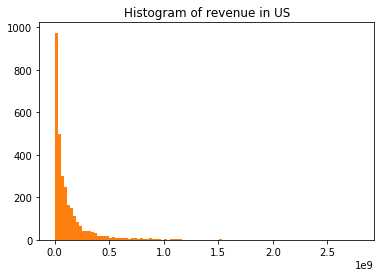

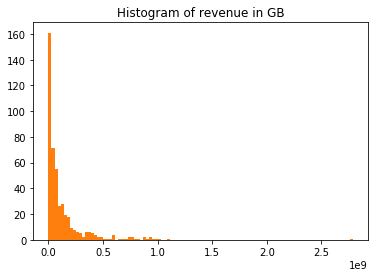

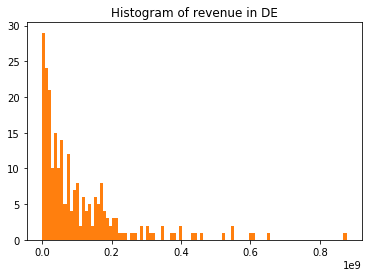

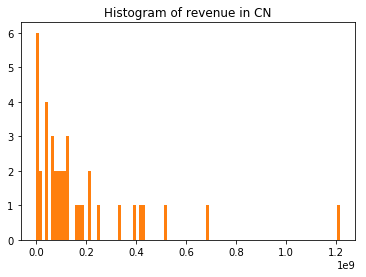

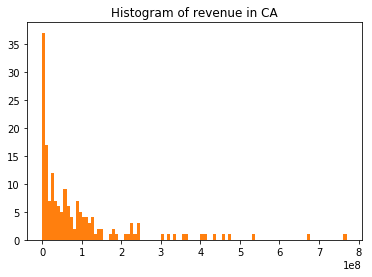

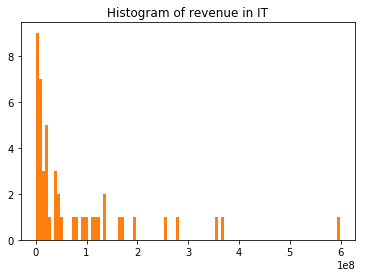

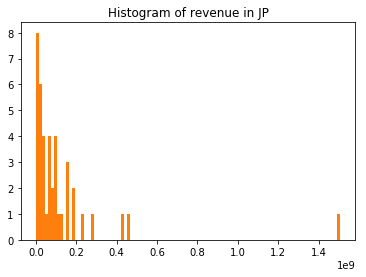

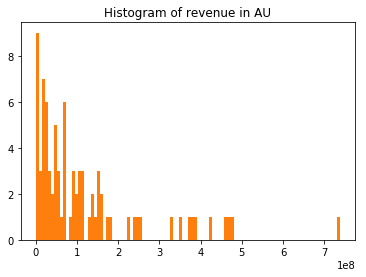

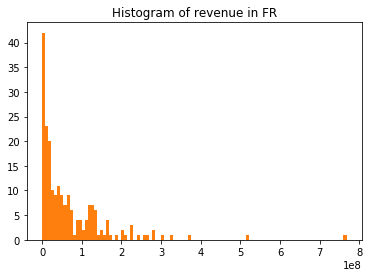

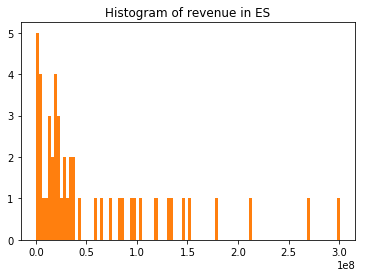

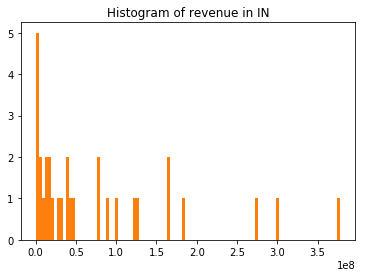

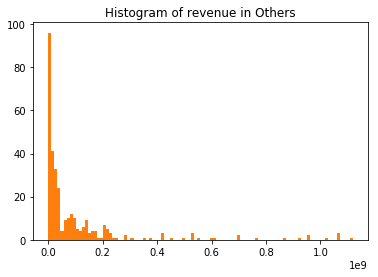

In [10]:
for key in dict_revenue_by_country.keys():
    plt.hist(dict_revenue_by_country.get(key),100, range=[min(dict_revenue_by_country.get(key)),
                                                          max(dict_revenue_by_country.get(key))], color="C1",align='mid')
    plt.title("Histogram of revenue in "+key)
    plt.show()

### Remark

The distribution of revenue in each country is a skew distribution
=> Apply transformation to get the Gausssian distribution


In [11]:
from sklearn.preprocessing import PowerTransformer

bc = PowerTransformer(method='box-cox')
revenue_list = np.array(df_movies_revenue_by_countries["revenue"]).reshape(-1,1)
transform_model = bc.fit(revenue_list)

def transform_distribution(samples,offset = 100):
    return transform_model.transform(np.array(samples).reshape(-1,1))+offset

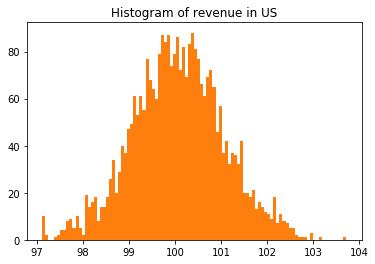

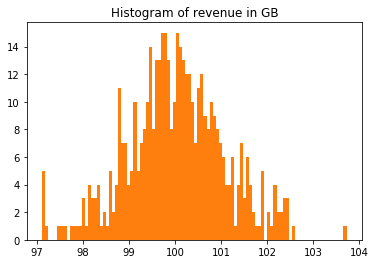

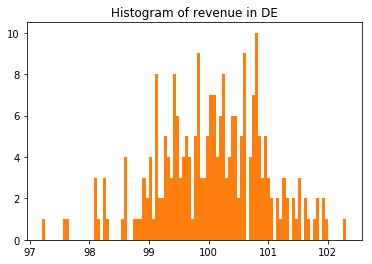

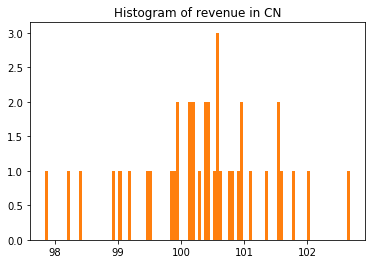

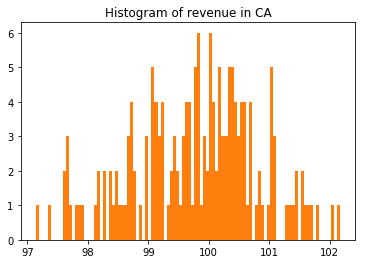

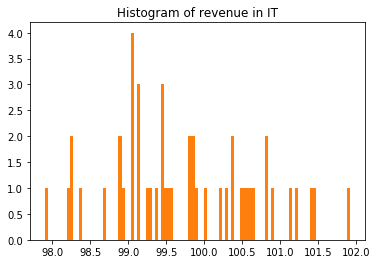

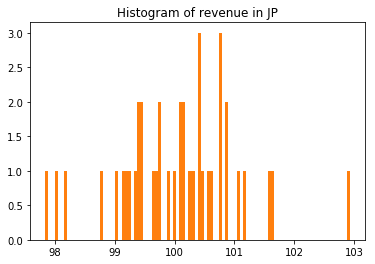

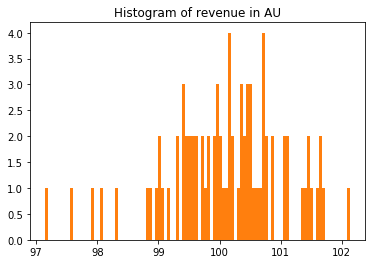

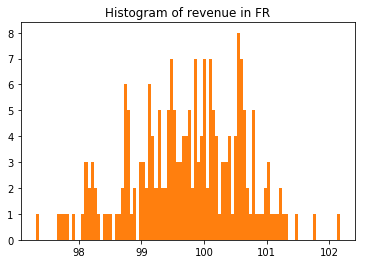

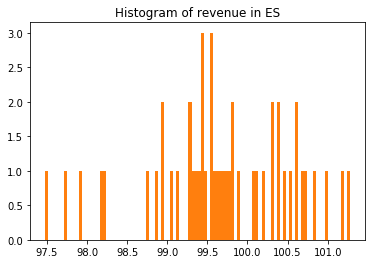

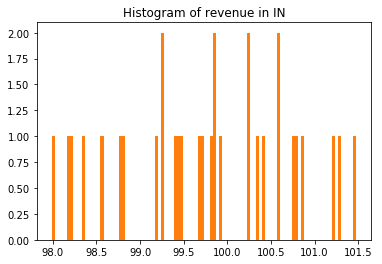

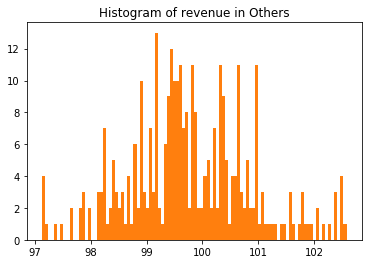

In [12]:
for key in dict_revenue_by_country.keys():
    plt.hist(transform_distribution(dict_revenue_by_country.get(key)),100, color="C1",align='mid')
    plt.title("Histogram of revenue in "+key)
    plt.show()

In [13]:
for key in dict_revenue_by_country.keys():
    print('=================================================')
    print('=============== statistic on '+key+' ============')
    print(pd.DataFrame(dict_revenue_by_country.get(key)).describe())

=============== statistic on US ============
                  0
count  3.011000e+03
mean   1.262128e+08
std    1.909916e+08
min    7.000000e+00
25%    1.799339e+07
50%    5.805837e+07
75%    1.522117e+08
max    2.787965e+09
=============== statistic on GB ============
                  0
count  4.590000e+02
mean   1.309041e+08
std    2.269062e+08
min    5.000000e+00
25%    1.709315e+07
50%    5.460000e+07
75%    1.435532e+08
max    2.787965e+09
=============== statistic on DE ============
                  0
count  2.390000e+02
mean   1.066116e+08
std    1.320229e+08
min    1.030000e+02
25%    1.930852e+07
50%    6.022230e+07
75%    1.513253e+08
max    8.766885e+08
=============== statistic on CN ============
                  0
count  3.900000e+01
mean   1.750020e+08
std    2.321788e+08
min    1.083480e+05
25%    4.551312e+07
50%    1.009144e+08
75%    2.027475e+08
max    1.215440e+09
=============== statistic on CA ============
                  0
count  1.700000e+02
mean   8.817833

## Remarks.
    1) There are only some countries have the total number of movies more than or in hundreds (US, GB, DE, CA, FR)
    2) The min revenue of these countries as comparing with the other fewer countries has a big gap. 
        => Question A: Should we trim the first quartile to remove the list of mininum revenues in those countries?
    
    3) Examine further to the first quartile 0.25, the differences are not much among countries        
    4) The mean values among all countries also do not have much difference (hundred millions - 1e8)
        => Answer A: The quartile is almost the same among the 2 and 3 quartile and also is the mean. Trimming the 1st quartile is not neccessary
        
   **Clarification by plotting and statistic checking in the below blocks of code. The first one is all quartile while the later is to remove the 1st quartile**

In [14]:
for key in dict_revenue_by_country.keys():
    print('=================================================')
    print('=============== statistic on '+key+' ============')
    df_dict_revenue_by_country = pd.DataFrame(dict_revenue_by_country.get(key),columns=["revenue"])
    
    print(len(df_dict_revenue_by_country))
    if len(df_dict_revenue_by_country) > 100:
        lower_quantile, upper_quantile = df_dict_revenue_by_country.revenue.quantile([.25, .75])
#         df_dict_revenue_by_country = df_dict_revenue_by_country.loc[(df_dict_revenue_by_country.revenue > lower_quantile)
#                                        & (df_dict_revenue_by_country.revenue < upper_quantile)]
        df_dict_revenue_by_country = df_dict_revenue_by_country[df_dict_revenue_by_country.revenue.between(
               *df_dict_revenue_by_country.revenue.quantile([0.25, 1]).tolist()
           )]                                          
    print(len(df_dict_revenue_by_country))                                 
    print(df_dict_revenue_by_country.describe())

# df[df.A.between(*df.A.quantile([0.25, 0.75]).tolist())]

=============== statistic on US ============
3011
2258
            revenue
count  2.258000e+03
mean   1.658661e+08
std    2.057852e+08
min    1.800000e+07
25%    4.474125e+07
50%    9.508482e+07
75%    1.940697e+08
max    2.787965e+09
=============== statistic on GB ============
459
344
            revenue
count  3.440000e+02
mean   1.726669e+08
std    2.485116e+08
min    1.728630e+07
25%    4.016023e+07
50%    8.407978e+07
75%    1.876432e+08
max    2.787965e+09
=============== statistic on DE ============
239
179
            revenue
count  1.790000e+02
mean   1.393729e+08
std    1.378161e+08
min    1.932214e+07
25%    5.038322e+07
50%    9.394577e+07
75%    1.736602e+08
max    8.766885e+08
=============== statistic on CN ============
39
39
            revenue
count  3.900000e+01
mean   1.750020e+08
std    2.321788e+08
min    1.083480e+05
25%    4.551312e+07
50%    1.009144e+08
75%    2.027475e+08
max    1.215440e+09
=============== statistic on CA ============
170
127
            rev

Text(0.5,1,'3 quartiles')

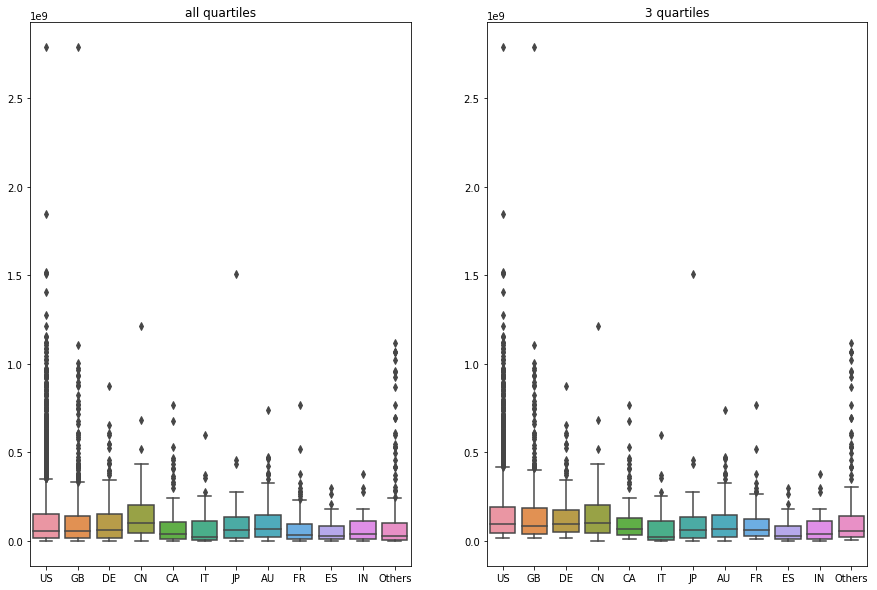

In [15]:
countries_list_all_quartile = []
revenue_list_all_quartile = []
countries_list_3_quartile = []
revenue_list_3_quartile = []
for key in dict_revenue_by_country.keys():
    df_dict_revenue_by_country = pd.DataFrame(dict_revenue_by_country.get(key),columns=["revenue"])
    
    # use all quartiles    
    countries_list_all_quartile = countries_list_all_quartile+[key]*len(df_dict_revenue_by_country)
    revenue_list_all_quartile = revenue_list_all_quartile+df_dict_revenue_by_country["revenue"].tolist()
    
    # use only the last 3 quartiles
    if len(df_dict_revenue_by_country) > 100:
        lower_quantile, upper_quantile = df_dict_revenue_by_country.revenue.quantile([.25, .75])
        df_dict_revenue_by_country = df_dict_revenue_by_country[df_dict_revenue_by_country.revenue.between(
               *df_dict_revenue_by_country.revenue.quantile([0.25, 1]).tolist()
           )]       
    countries_list_3_quartile = countries_list_3_quartile+[key]*len(df_dict_revenue_by_country)
    revenue_list_3_quartile = revenue_list_3_quartile+df_dict_revenue_by_country["revenue"].tolist()


fig, ax = plt.subplots(1,2,figsize=(15, 10))
sns.boxplot(x= countries_list_all_quartile,y=revenue_list_all_quartile,ax=ax[0]).set_title('all quartiles')
# fig, ax = plt.subplots(1,1,figsize=(15, 10))
sns.boxplot(x= countries_list_3_quartile,y=revenue_list_3_quartile,ax=ax[1]).set_title('3 quartiles')


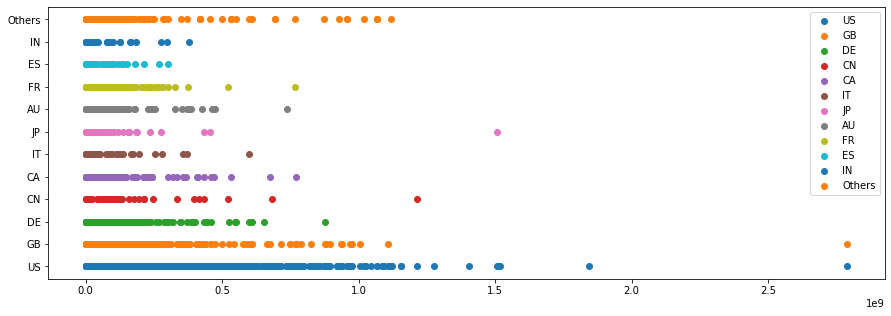

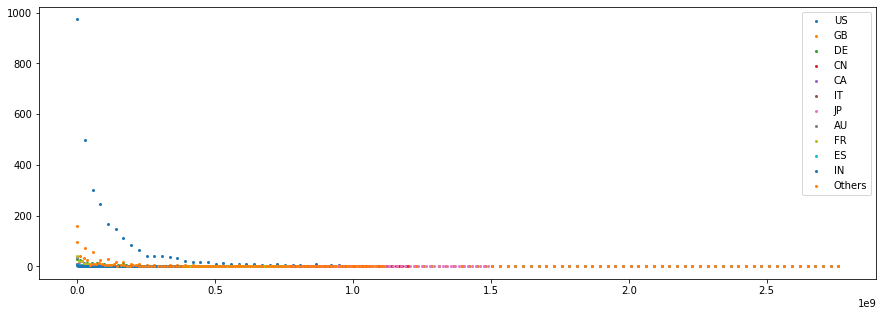

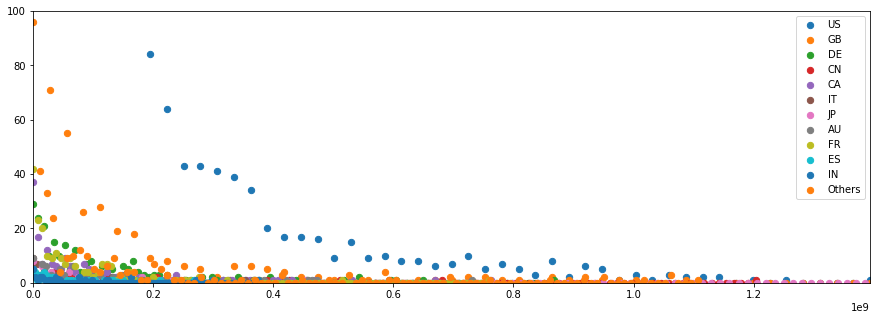

In [ ]:
fig = plt.gcf()
# color_map = np.random.rand(len(dict_revenue_by_country.keys()),3)
color_map = ['C'+str(x) for x in range(len(dict_revenue_by_country.keys()))]
color_index = 0
for key in dict_revenue_by_country.keys():
    countries_order_list = []
    countries_order_list = [key]*len(dict_revenue_by_country.get(key))
    plt.scatter(dict_revenue_by_country.get(key),countries_order_list,c=color_map[color_index],label=key)
    color_index = color_index+1
plt.legend()
fig.set_size_inches(15, 5)
plt.show()

fig = plt.gcf()
color_index = 0
for key in dict_revenue_by_country.keys():
    bins_list, revenue_list = (np.histogram(dict_revenue_by_country.get(key),bins = 100))
    countries_order_list = []
    countries_order_list = [key]*len(dict_revenue_by_country.get(key))
    plt.scatter(revenue_list[:-1],bins_list,s=4,c=color_map[color_index],label=key) #color_map[color_index].reshape(1,3))
    color_index = color_index+1
plt.legend()
fig.set_size_inches(15, 5)
plt.show()

fig = plt.gcf()
color_index = 0
for key in dict_revenue_by_country.keys():
    bins_list, revenue_list = (np.histogram(dict_revenue_by_country.get(key),bins = 100))
    countries_order_list = []
    countries_order_list = [key]*len(dict_revenue_by_country.get(key))
    plt.scatter(revenue_list[:-1],bins_list,s=40,c=color_map[color_index],label=key) #color_map[color_index].reshape(1,3))
    color_index = color_index+1
plt.xlim(left=0,right=max(dict_revenue_by_country.get('US'))/2)
plt.ylim(bottom=0,top=100)
plt.legend()
fig.set_size_inches(15, 5)
plt.show()

In [16]:
import scipy.stats as stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### The ANOVA test as well as T-test have important assumptions that must be satisfied in order for the associated p-value to be valid.

1) The samples are independent. (Checked)

2) Each sample is from a normally distributed population. (Checked - use the transformation model of the entire population)

3) The population standard deviations of the groups are all equal. This property is known as homoscedasticity. (Checked - summary  result)

#### PERFORM ONE-WAY ANOVA USING SCIPY STATS PACKAGE
1) First we check with the none transform data (violate the normal distribution assumaption)

2) Then we check with the transformed data

In [17]:
# Without transformation
samples = [(dict_revenue_by_country.get(key)) for key in dict_revenue_by_country.keys()]
print("===================================")
print("One-way ANOVA with origin data - Which violates the normal distribution assumption")
print(f_oneway(*samples))
print("===================================")
print("One-way ANOVA using transformation to match normal distribution")
# With transformation
samples_transform = [transform_distribution(dict_revenue_by_country.get(key)).reshape(-1).tolist()
                     for key in dict_revenue_by_country.keys()]
print(f_oneway(*samples_transform))

One-way ANOVA with origin data - Which violates the normal distribution assumption
F_onewayResult(statistic=3.788146900860527, pvalue=1.9566210189329563e-05)
One-way ANOVA using transformation to match normal distribution
F_onewayResult(statistic=6.5792761461784055, pvalue=5.339477023860328e-11)


In [18]:
countries_order_list = []
revenue_order_list = []
countries_mean_revenue = {}
for key in dict_revenue_by_country.keys():    
    countries_order = [key]*len(dict_revenue_by_country.get(key))
    countries_order_list = countries_order_list+countries_order
    revenue_order_list = revenue_order_list+transform_distribution(dict_revenue_by_country.get(key)).reshape(-1).tolist()
    countries_mean_revenue[key] = np.mean(revenue_order_list)

countries_mean_revenue = {k: v for k, v in sorted(countries_mean_revenue.items(), key=lambda item: item[1])}
df_oneway_ANOVA = pd.DataFrame(list(zip(countries_order_list,revenue_order_list)),columns =['countries', 'revenue'])

In [20]:
model = ols('revenue ~ countries', data = df_oneway_ANOVA).fit()                # Model formula check the influence of countries group on transformed revenue
            

In [21]:
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq      df         F        PR(>F)
countries    71.201462    11.0  6.579276  5.339477e-11
Residual   4609.222863  4685.0       NaN           NaN


**The ANOVA result has small p-value and thus lead to the rejection of null hypothesis and adopt the alternative hypothesis. However, we do not know which group has more impact than other. We need to check pairwise testing or refer to the plotted graph from the above cell.**

> **The null hypothesis**: the countries group has no influence on the revenue (which implies the close mean of different country group)

> **The alternative hypothesis**: the countries group has no influence on the revenue

In [22]:
# checking T-test for each pair of countries
pair_t = model.t_test_pairwise('countries')
res_frame = pair_t.result_frame
rejected_pair = (res_frame.index[res_frame["reject-hs"]==True]).tolist()
res_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
CA-AU,-0.319126,0.133361,-2.392950,1.675264e-02,-0.580575,-0.057676,0.540285,False
CN-AU,0.249539,0.192936,1.293378,1.959441e-01,-0.128706,0.627783,0.997228,False
DE-AU,-0.048918,0.126942,-0.385353,6.999930e-01,-0.297784,0.199949,1.000000,False
ES-AU,-0.438824,0.179098,-2.450195,1.431423e-02,-0.789939,-0.087708,0.492181,False
FR-AU,-0.370227,0.129424,-2.860568,4.247550e-03,-0.623960,-0.116494,0.208727,False
GB-AU,-0.085767,0.118917,-0.721233,4.708022e-01,-0.318900,0.147367,1.000000,False
IN-AU,-0.345340,0.209127,-1.651341,9.873595e-02,-0.755328,0.064647,0.969328,False
IT-AU,-0.356317,0.180262,-1.976668,4.813773e-02,-0.709715,-0.002920,0.874075,False
JP-AU,-0.062854,0.189720,-0.331300,7.404325e-01,-0.434794,0.309086,1.000000,False
Others-AU,-0.335580,0.122730,-2.734284,6.275120e-03,-0.576189,-0.094970,0.279157,False


In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(df_oneway_ANOVA['revenue'], df_oneway_ANOVA['countries'],alpha=0.05) 
tukey.summary()

group1,group2,meandiff,lower,upper,reject
AU,CA,-0.3191,-0.7552,0.1169,False
AU,CN,0.2495,-0.3813,0.8804,False
AU,DE,-0.0489,-0.464,0.3662,False
AU,ES,-0.4388,-1.0244,0.1468,False
AU,FR,-0.3702,-0.7934,0.053,False
AU,GB,-0.0858,-0.4746,0.3031,False
AU,IN,-0.3453,-1.0291,0.3385,False
AU,IT,-0.3563,-0.9457,0.2331,False
AU,JP,-0.0629,-0.6832,0.5575,False
AU,Others,-0.3356,-0.7369,0.0657,False


In [24]:
from itertools import combinations 
comb = np.array(list(combinations(tukey.groupsunique, 2)))
tukey_rejected_pair = comb[tukey.reject]
print("Using tukey -- Number of rejected pair = ",len(tukey_rejected_pair))
for pair in tukey_rejected_pair:
    print(pair)
    
print("Using pairwise comparison with t-test -- Number of rejected pair = ",len(rejected_pair))
print(rejected_pair)
print("Mean revenue by countries")
print(countries_mean_revenue)

Using tukey -- Number of rejected pair =  9
['CA' 'US']
['CN' 'FR']
['CN' 'Others']
['DE' 'FR']
['DE' 'Others']
['FR' 'GB']
['FR' 'US']
['GB' 'Others']
['Others' 'US']
Using pairwise comparison with t-test -- Number of rejected pair =  9
['US-CA', 'FR-CN', 'Others-CN', 'FR-DE', 'Others-DE', 'GB-FR', 'US-FR', 'Others-GB', 'US-Others']
Mean revenue by countries
{'Others': 100.01170128239, 'IN': 100.02957096975656, 'ES': 100.03150614753442, 'FR': 100.0356882086934, 'JP': 100.04991057187351, 'IT': 100.05000454843979, 'AU': 100.05098873899342, 'CA': 100.05371232845816, 'DE': 100.0629000573156, 'GB': 100.06346093878823, 'CN': 100.06592092380832, 'US': 100.0704051770247}


**From the pairwise comparison, we achieved the following conclusion**
1) The revenue in has critical different among following groups
    CA-US-CN-FR-GB-DE-Others

2) When look further into the mean difference result among these groups
   > CN - US - GB has the same revenue and also represents its region (Asia, North America, Europe)
   
   > As examining further it remarks that the revenue in decreasing order is as the following North America > Asia ~ Europe > Australia.
   


## 2. How is a movie’s revenue and average score affected by its genre?

In [25]:
df_revenue_score_genre = df_movies[["revenue","vote_average","genres"]]
df_revenue_score_genre.head(2)

,revenue,vote_average,genres
0,2787965087,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,961000000,6.9,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."


In [26]:
def parse_genre(genres):
    load_genre = json.loads(genres)
    genre_names = []
    for genre in load_genre:
        genre_names.append(genre["name"])
    return genre_names

In [27]:
# df_movies_revenue_by_countries = df_movies[["production_countries","revenue"]]
# remove empty info row
df_revenue_score_genre.replace(['[]','',0], np.nan, inplace=True)
df_revenue_score_genre.dropna(inplace=True)

df_revenue_score_genre["genres"] = df_revenue_score_genre["genres"].apply(lambda x:parse_genre(x))
df_revenue_score_genre["score"] = df_revenue_score_genre["vote_average"]
del df_revenue_score_genre["vote_average"]
df_revenue_score_genre.head(3)

,revenue,genres,score
0,2.787965e+09,"[Action, Adventure, Fantasy, Science Fiction]",7.2
1,9.610000e+08,"[Adventure, Fantasy, Action]",6.9
2,8.806746e+08,"[Action, Adventure, Crime]",6.3


In [28]:
genres_list = (",".join([",".join(x) for x in df_revenue_score_genre["genres"]])).split(",")
genres_list = list(dict.fromkeys(genres_list))
print(len(genres_list))
print(genres_list)

19
['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign']


In [29]:
dict_revenue_score_genre = {}
for index, row in df_revenue_score_genre.iterrows():
    for genre in row["genres"]:
        if genre in dict_revenue_score_genre:
            dict_revenue_score_genre[genre].append([row["revenue"],row["score"]])
        else:
            dict_revenue_score_genre[genre] = [[row["revenue"],row["score"]]]


## Check genre sample sizes

In [30]:
for genre in list(dict_revenue_score_genre.keys()):
    print(genre+" : "+str(len(dict_revenue_score_genre.get(genre))))
    
dict_revenue_score_genre.pop("Foreign")
print(dict_revenue_score_genre.keys())

Action : 940
Adventure : 675
Fantasy : 351
Science Fiction : 439
Crime : 536
Drama : 1525
Thriller : 959
Animation : 191
Family : 382
Western : 61
Comedy : 1174
Romance : 604
Horror : 344
Mystery : 268
History : 150
War : 122
Music : 121
Documentary : 47
Foreign : 6
dict_keys(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary'])


### Only the "Foreign" category has too small number of instances ( 6 < 30)
> Remove the foreign genre before continuing our process

**Next step is to check the distribution and perform transformation if needed**
1. Distribution of revenue according to genre
1. Distribution of score according to genre

(940, 2)


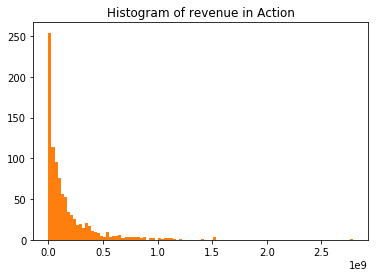

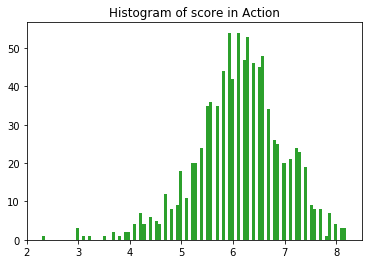

(675, 2)


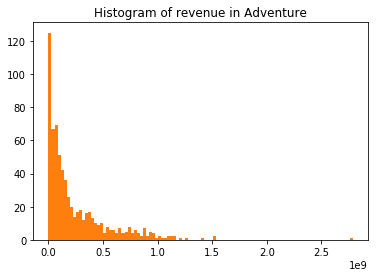

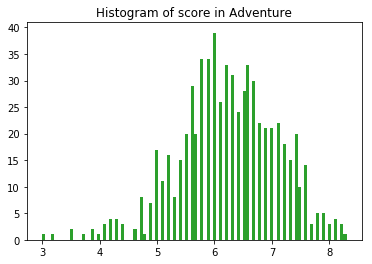

(351, 2)


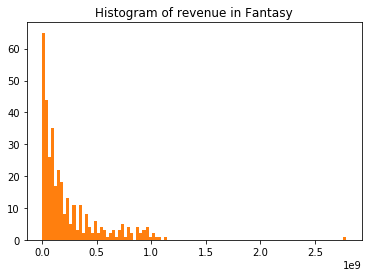

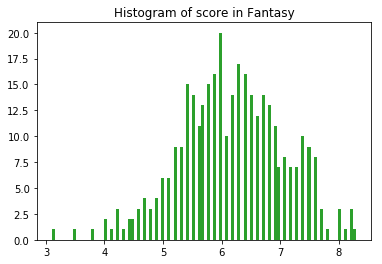

(439, 2)


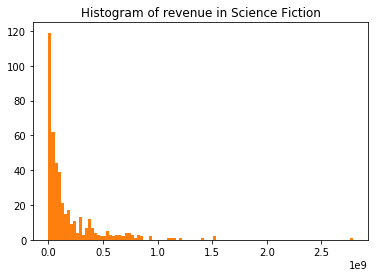

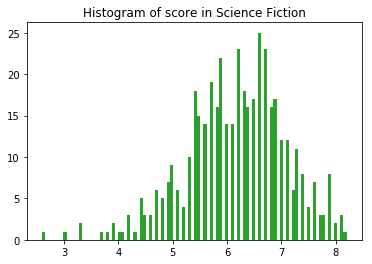

(536, 2)


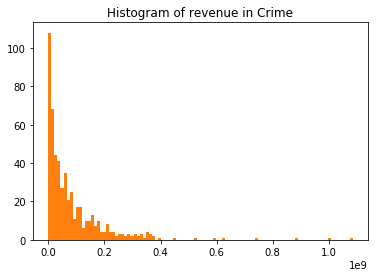

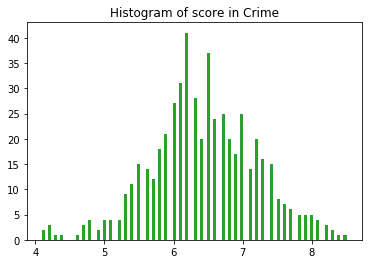

(1525, 2)


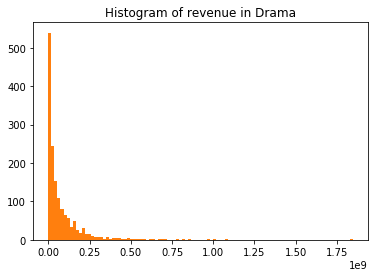

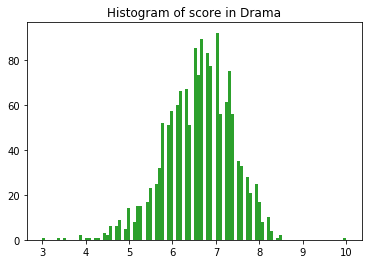

(959, 2)


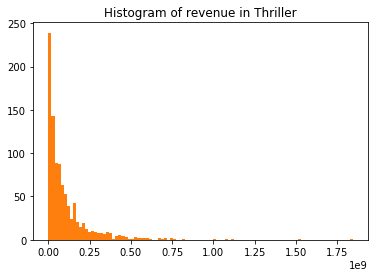

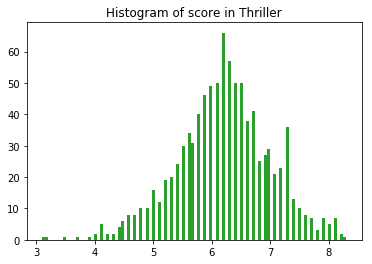

(191, 2)


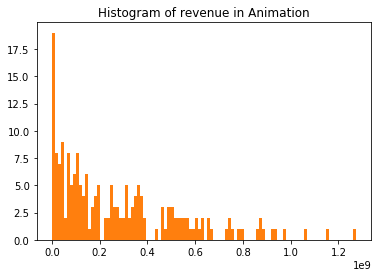

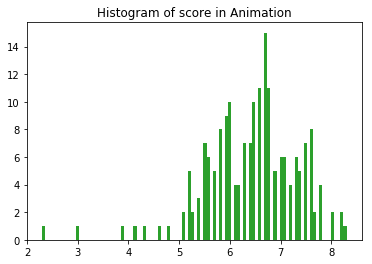

(382, 2)


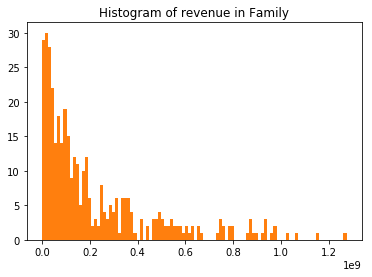

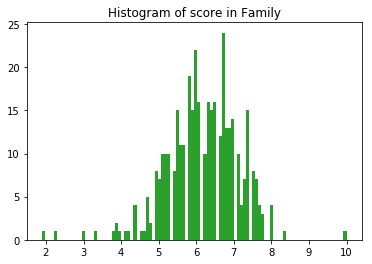

(61, 2)


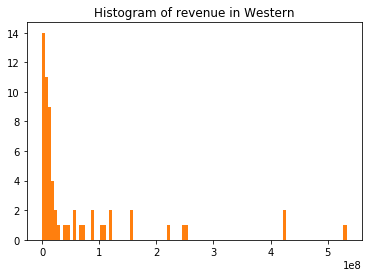

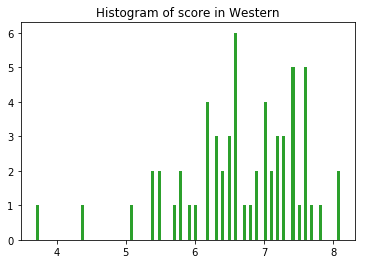

(1174, 2)


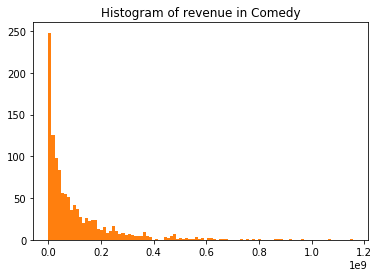

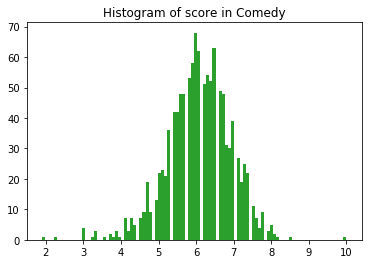

(604, 2)


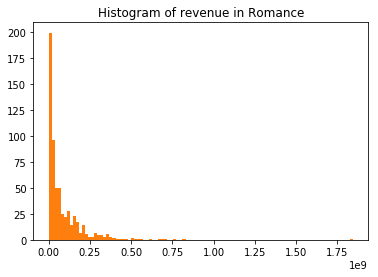

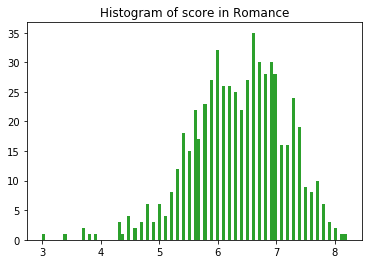

(344, 2)


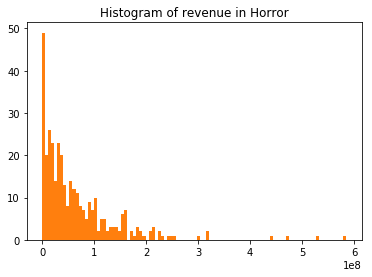

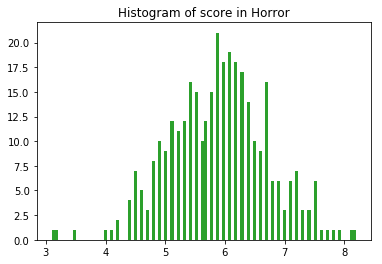

(268, 2)


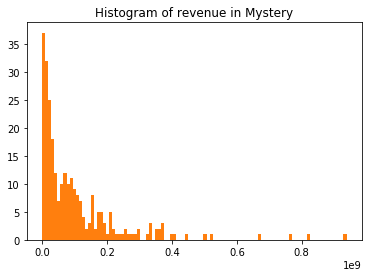

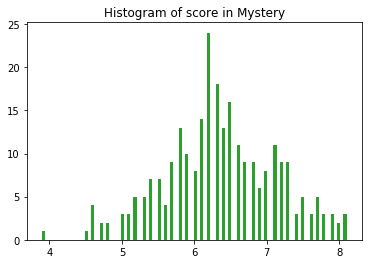

(150, 2)


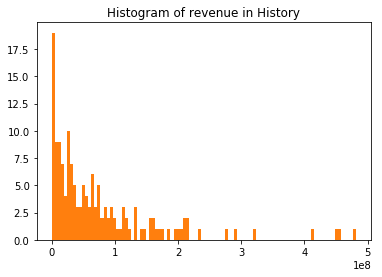

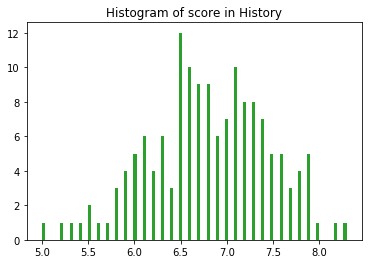

(122, 2)


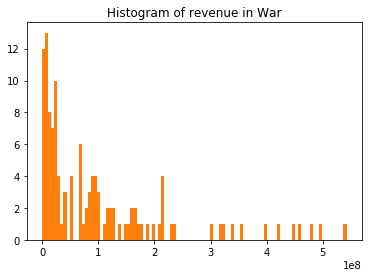

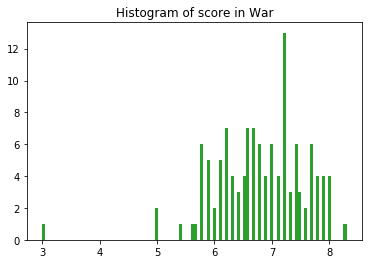

(121, 2)


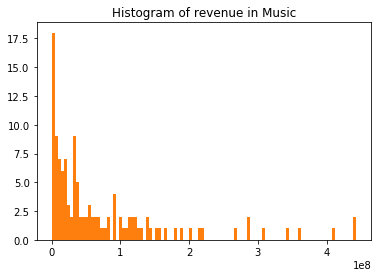

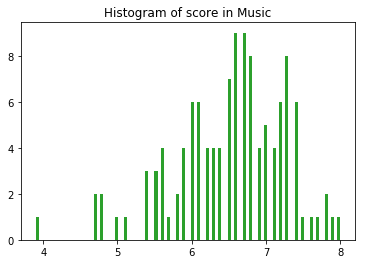

(47, 2)


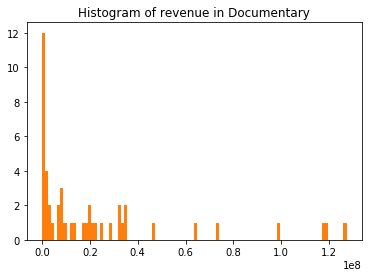

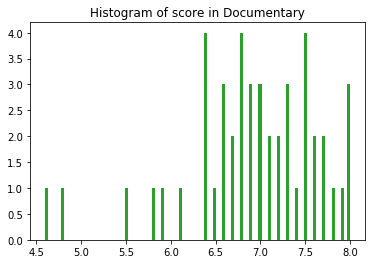

In [31]:
for genre in dict_revenue_score_genre.keys():
    revenue_score_genre_list = np.array(dict_revenue_score_genre.get(genre))
    print(revenue_score_genre_list.shape)
    revenue_genre_list = revenue_score_genre_list[:,0]
    score_genre_list = revenue_score_genre_list[:,1]
    plt.hist(revenue_genre_list,100, color="C1",align='mid')
    plt.title("Histogram of revenue in "+genre)
    plt.show()
    
    plt.hist(score_genre_list,100, color="C2",align='mid')
    plt.title("Histogram of score in "+genre)
    plt.show()

**According to the graph, the transformation is only needed in revenue column (as score has form the bell-shape distribution)**

(47, 2)


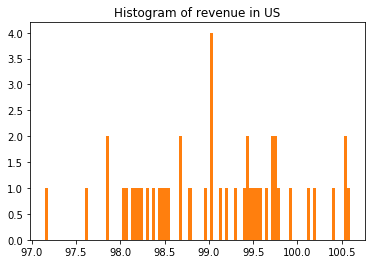

(47, 2)


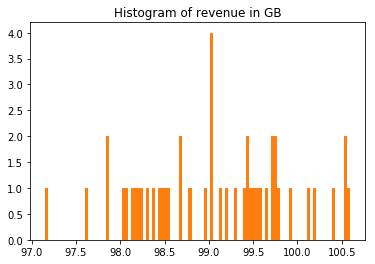

(47, 2)


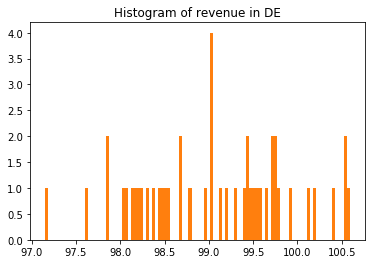

(47, 2)


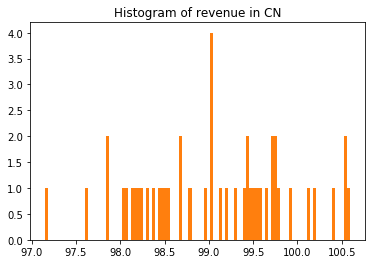

(47, 2)


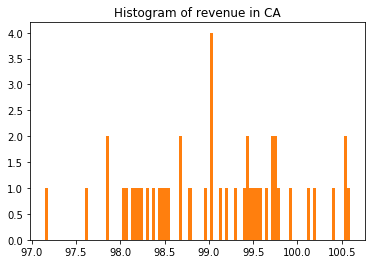

(47, 2)


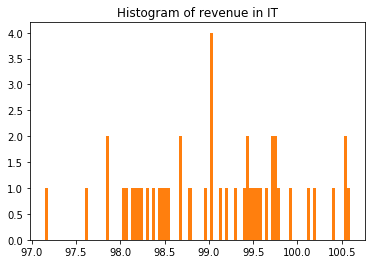

(47, 2)


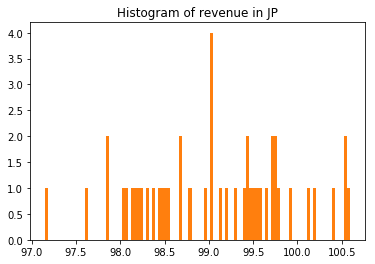

(47, 2)


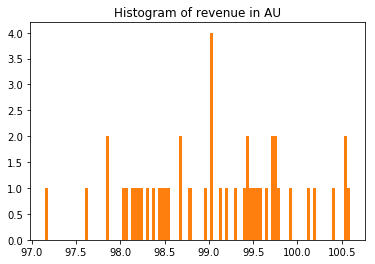

(47, 2)


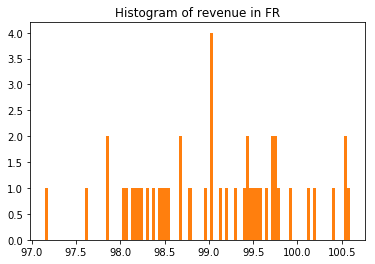

(47, 2)


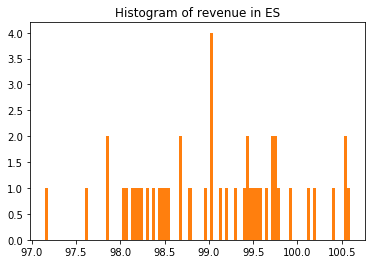

(47, 2)


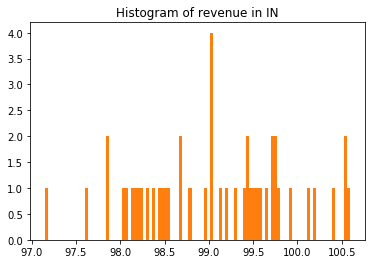

(47, 2)


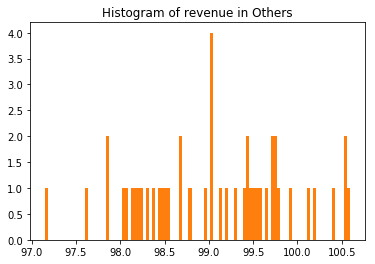

In [32]:
for key in dict_revenue_by_country.keys():
    revenue_score_genre_list = np.array(dict_revenue_score_genre.get(genre))
    print(revenue_score_genre_list.shape)
    revenue_genre_list = transform_distribution(revenue_score_genre_list[:,0]
                                               )
    score_genre_list = revenue_score_genre_list[:,1]
    plt.hist(revenue_genre_list,100, color="C1",align='mid')
    plt.title("Histogram of revenue in "+key)
    plt.show()

### Next we will plot to visualize the relationship between revenue and score with respect to different genre

- The first plot is using revenue data
- The second plot is using transformed revenue data

====================== plot on Action =======================
The correlation between score and revenue in Action =  0.3179653520577772


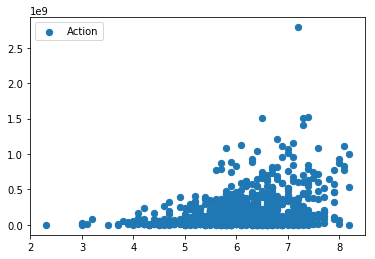

ValueError: RGBA values should be within 0-1 range

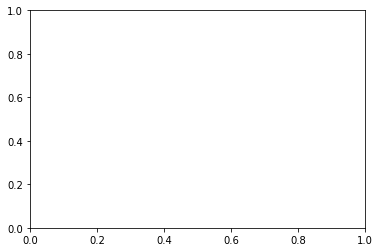

In [33]:
fig = plt.gcf()
# color_map = np.random.rand(len(dict_revenue_by_country.keys()),3)
color_map = ['C'+str(x) for x in range(len(dict_revenue_score_genre.keys()))]
color_index = 0
for genre in dict_revenue_score_genre.keys():
    print("====================== plot on "+genre+" =======================")
    revenue_score_genre_list = np.array(dict_revenue_score_genre.get(genre))
    revenue_genre_list_transform = transform_distribution(revenue_score_genre_list[:,0])
    revenue_genre_list = (revenue_score_genre_list[:,0])
    score_genre_list = revenue_score_genre_list[:,1]
    plt.scatter(score_genre_list,revenue_genre_list,s=40,c=color_map[color_index],label=genre)
    
    plt.legend()
#     fig.set_size_inches(15, 5)
    print("The correlation between score and revenue in "+genre+" = ",np.corrcoef(score_genre_list,revenue_genre_list)[0][1])
    plt.show()
    
    plt.scatter(score_genre_list,revenue_genre_list_transform,s=40,c=color_map[color_index-1],label=genre+" transform")
    plt.legend()
    plt.show()
    color_index = color_index+1

### Remark

The plot results show a rally weak positive correation between score and revenue with respect to different movie genre.

The computation show at the end of each plot also support for this comment

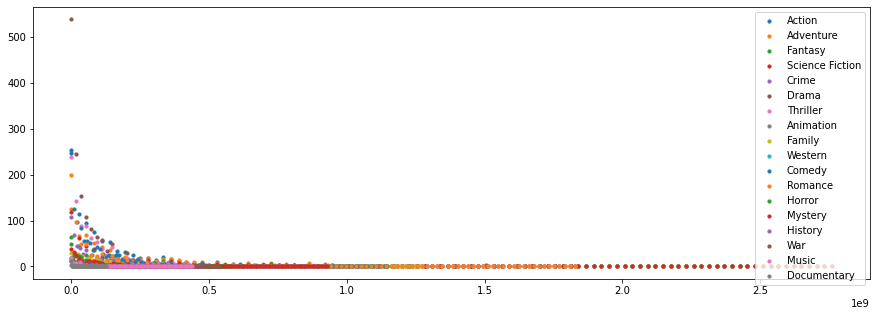

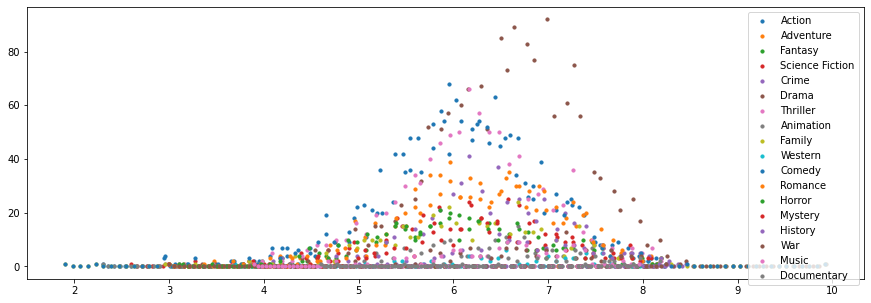

In [ ]:
fig = plt.gcf()
# color_map = np.random.rand(len(dict_revenue_by_country.keys()),3)
color_map = ['C'+str(x) for x in range(len(dict_revenue_score_genre.keys()))]
color_index = 0
for genre in dict_revenue_score_genre.keys():
    revenue_score_genre_list = np.array(dict_revenue_score_genre.get(genre))
    revenue_genre_list = (revenue_score_genre_list[:,0])
    score_genre_list = revenue_score_genre_list[:,1]
    revenue_bins_list, revenue_list = (np.histogram(revenue_genre_list,bins = 100))

    plt.scatter(revenue_list[:-1],revenue_bins_list,s=10,c=color_map[color_index],label=genre)
    color_index = color_index+1
plt.legend()
fig.set_size_inches(15, 5)
plt.show()

fig = plt.gcf()
color_index = 0
for genre in dict_revenue_score_genre.keys():
    revenue_score_genre_list = np.array(dict_revenue_score_genre.get(genre))
    score_genre_list = revenue_score_genre_list[:,1]
    score_bins_list, score_list = (np.histogram(score_genre_list,bins = 100))

    plt.scatter(score_list[:-1],score_bins_list,s=10,c=color_map[color_index],label=genre)
    color_index = color_index+1
plt.legend()
fig.set_size_inches(15, 5)
plt.show()

In [ ]:
for genre in dict_revenue_score_genre.keys():
    print('===============================================================')
    print('=============== statistic on '+genre+' ============')
    print(pd.DataFrame(dict_revenue_score_genre.get(genre)).describe())

=============== statistic on Action ============
                  0           1
count  9.400000e+02  940.000000
mean   1.733616e+08    6.130000
std    2.446129e+08    0.846149
min    5.000000e+00    2.300000
25%    2.475330e+07    5.600000
50%    8.549061e+07    6.200000
75%    2.152864e+08    6.625000
max    2.787965e+09    8.200000
=============== statistic on Adventure ============
                  0           1
count  6.750000e+02  675.000000
mean   2.442097e+08    6.237037
std    2.934743e+08    0.861468
min    1.500000e+01    3.000000
25%    4.318714e+07    5.700000
50%    1.276004e+08    6.200000
75%    3.513211e+08    6.800000
max    2.787965e+09    8.300000
=============== statistic on Fantasy ============
                  0           1
count  3.510000e+02  351.000000
mean   2.335675e+08    6.168376
std    2.958512e+08    0.898441
min    1.600000e+01    3.100000
25%    4.143252e+07    5.600000
50%    1.224898e+08    6.200000
75%    3.033653e+08    6.800000
max    2.787965e+

According to the above statistics, the min, mean, max and value in each quartiles do not have much different (as in countries problem)

**=> continue to conduct tests without further data process**

Text(0.5, 1.0, 'all score quartiles')

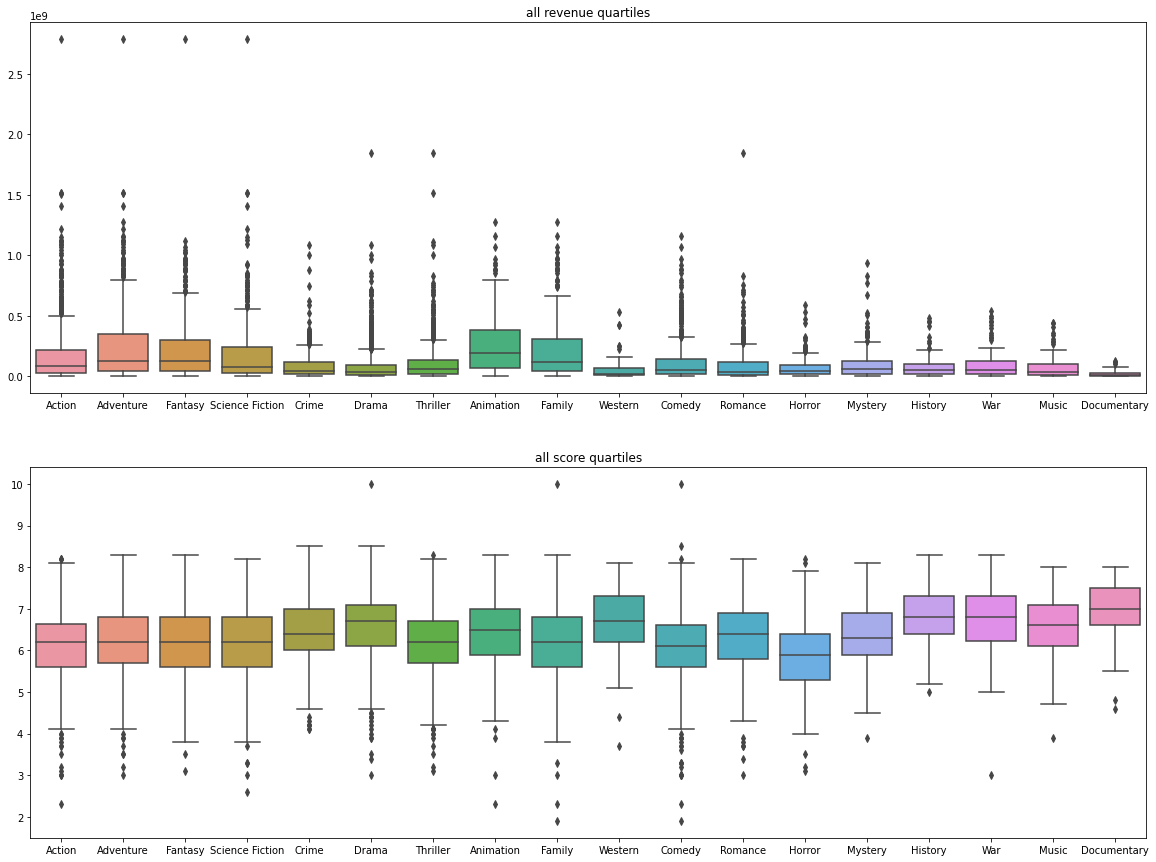

In [ ]:
genre_list_all_quartile = []
revenue_list_all_quartile = []
score_list_all_quartile = []

for genre in dict_revenue_score_genre.keys():
    df_dict_revenue_score_by_genre = pd.DataFrame(dict_revenue_score_genre.get(genre),columns=["revenue","score"])
    
    genre_list_all_quartile = genre_list_all_quartile+[genre]*len(df_dict_revenue_score_by_genre)
    revenue_list_all_quartile = revenue_list_all_quartile+df_dict_revenue_score_by_genre["revenue"].tolist()
    score_list_all_quartile = score_list_all_quartile +df_dict_revenue_score_by_genre["score"].tolist()   

fig, ax = plt.subplots(2,1,figsize=(20, 15))
sns.boxplot(x= genre_list_all_quartile,y=revenue_list_all_quartile,ax=ax[0]).set_title('all revenue quartiles')
sns.boxplot(x= genre_list_all_quartile,y=score_list_all_quartile,ax=ax[1]).set_title('all score quartiles')


#### The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

1) The samples are independent. (Checked)

2) Each sample is from a normally distributed population. (Checked - use the transformation model of the entire population)

3) The population standard deviations of the groups are all equal. This property is known as homoscedasticity. (Checked - summary  result)

In [ ]:
# Without transformation   
samples_score = [(np.array(dict_revenue_score_genre.get(genre))[:,1]).tolist() for genre in dict_revenue_score_genre.keys()]
print("===================================")
print("One-way ANOVA with \"Score\" data - Which violates the normal distribution assumption")
print(stats.f_oneway(*samples_score))
print("===================================")
print("One-way ANOVA using with transformed \"Revenue\" data to match normal distribution")
# With transformation
samples_revenue_transform = [transform_distribution(
                        np.array(dict_revenue_score_genre.get(genre))[:,0]
                        ).reshape(-1).tolist()
                     for genre in dict_revenue_score_genre.keys()]
print(f_oneway(*samples_revenue_transform))


One-way ANOVA with "Score" data - Which violates the normal distribution assumption
F_onewayResult(statistic=36.555366610143246, pvalue=8.15376407804789e-117)
One-way ANOVA using with transformed "Revenue" data to match normal distribution
F_onewayResult(statistic=53.44941278894138, pvalue=4.2757582017073516e-173)


In [ ]:
genre_order_list = []
revenue_genre_order_list = []
score_genre_order_list = []
genre_mean_revenue = {}
genre_mean_score = {}
for genre in dict_revenue_score_genre.keys():    
    genre_order = [genre]*len(dict_revenue_score_genre.get(genre))
    genre_order_list = genre_order_list+genre_order
    
    revenue_score_genre_list = np.array(dict_revenue_score_genre.get(genre))
    
    revenue_genre_list = (revenue_score_genre_list[:,0])
    revenue_genre_order_list = revenue_genre_order_list+transform_distribution(revenue_genre_list).reshape(-1).tolist()
    score_genre_order_list = score_genre_order_list+revenue_score_genre_list[:,1].reshape(-1).tolist()
    
    genre_mean_revenue[genre] = np.mean(revenue_genre_order_list)
    genre_mean_score[genre] = np.mean(score_genre_order_list)

genre_mean_revenue = {k: v for k, v in sorted(genre_mean_revenue.items(), key=lambda item: item[1])}
genre_mean_score = {k: v for k, v in sorted(genre_mean_score.items(), key=lambda item: item[1])}

df_oneway_ANOVA_revenue = pd.DataFrame(list(zip(genre_order_list,revenue_genre_order_list)),columns =['genre', 'revenue'])
df_oneway_ANOVA_score = pd.DataFrame(list(zip(genre_order_list,score_genre_order_list)),columns =['genre', 'score'])

In [ ]:
model_revenue_genre = ols('revenue ~ genre',                 # Model formula check the influence of genre group on revenue
            data = df_oneway_ANOVA_revenue).fit()
anova_result_rev_gen = sm.stats.anova_lm(model_revenue_genre, typ=2)
print(anova_result_rev_gen)

               sum_sq      df          F         PR(>F)
genre      856.909660    17.0  53.449413  4.275758e-173
Residual  8365.959507  8871.0        NaN            NaN


In [ ]:
model_score_genre = ols('score ~ genre',                 # Model formula check the influence of genre group on revenue
            data = df_oneway_ANOVA_score).fit()
anova_result_sco_gen = sm.stats.anova_lm(model_score_genre, typ=2)
print(anova_result_sco_gen)

               sum_sq      df          F         PR(>F)
genre      427.475118    17.0  36.555367  8.153764e-117
Residual  6102.156683  8871.0        NaN            NaN


In [ ]:
pair_t_score = model_score_genre.t_test_pairwise('genre')
df_pair_t_score = pair_t_score.result_frame
rejected_df_pair_t_score = df_pair_t_score.index[df_pair_t_score["reject-hs"]==True].tolist()
print("The total rejected pair is",len(rejected_df_pair_t_score))
print("The total number of comparision pair is",len(df_pair_t_score))
df_pair_t_score

The total rejected pair is 95
The total number of comparision pair is 153


,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Adventure-Action,0.107037,0.041843,2.558045,1.054270e-02,0.025015,0.189060,3.727070e-01,False
Animation-Action,0.311885,0.065827,4.737925,2.192733e-06,0.182848,0.440922,2.082882e-04,True
Comedy-Action,-0.050613,0.036300,-1.394295,1.632635e-01,-0.121770,0.020544,9.932004e-01,False
Crime-Action,0.301157,0.044890,6.708730,2.083407e-11,0.213161,0.389152,2.500093e-09,True
Documentary-Action,0.787021,0.123966,6.348708,2.277815e-10,0.544020,1.030022,2.687821e-08,True
...,...,...,...,...,...,...,...,...
War-Science Fiction,0.637587,0.084884,7.511298,6.421583e-14,0.471195,0.803979,8.342216e-12,True
Western-Science Fiction,0.513817,0.113330,4.533828,5.868355e-06,0.291665,0.735969,5.397446e-04,True
War-Thriller,0.590896,0.079722,7.411948,1.358748e-13,0.434623,0.747170,1.752998e-11,True
Western-Thriller,0.467126,0.109517,4.265331,2.016768e-05,0.252447,0.681804,1.652399e-03,True


In [ ]:
print("========================================")
print("List of rejected pair in score")
print(pd.DataFrame(np.array(rejected_df_pair_t_score).reshape(int(len(rejected_df_pair_t_score)/5),5)))

List of rejected pair in score
                        0  ...                            4
0        Animation-Action  ...               History-Action
1           Horror-Action  ...                   War-Action
2          Western-Action  ...              Drama-Adventure
3       History-Adventure  ...            Western-Adventure
4        Comedy-Animation  ...            History-Animation
5        Horror-Animation  ...                 Crime-Comedy
6      Documentary-Comedy  ...                 Music-Comedy
7          Mystery-Comedy  ...               Western-Comedy
8       Documentary-Crime  ...                History-Crime
9            Horror-Crime  ...           Family-Documentary
10    Fantasy-Documentary  ...  Science Fiction-Documentary
11   Thriller-Documentary  ...                Mystery-Drama
12          Romance-Drama  ...                Horror-Family
13           Music-Family  ...               Horror-Fantasy
14          Music-Fantasy  ...              Mystery-History
15       

In [ ]:
pair_t_revenue = model_revenue_genre.t_test_pairwise('genre')
df_pair_t_revenue = pair_t_revenue.result_frame
rejected_df_pair_t_revenue = df_pair_t_revenue.index[df_pair_t_revenue["reject-hs"]==True].tolist()

print("The total rejected pair is",len(rejected_df_pair_t_revenue))
print("The total number of comparision pair is",len(df_pair_t_revenue))

df_pair_t_revenue

The total rejected pair is 98
The total number of comparision pair is 153


,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Adventure-Action,0.308018,0.048994,6.286871,3.392082e-10,0.211979,0.404058,3.120716e-08,True
Animation-Action,0.460182,0.077077,5.970452,2.456867e-09,0.309094,0.611270,2.137474e-07,True
Comedy-Action,-0.322883,0.042504,-7.596587,3.348996e-14,-0.406200,-0.239566,3.554046e-12,True
Crime-Action,-0.417231,0.052562,-7.937952,2.305692e-15,-0.520264,-0.314198,2.587930e-13,True
Documentary-Action,-1.234153,0.145150,-8.502602,2.155029e-17,-1.518681,-0.949626,0.000000e+00,True
...,...,...,...,...,...,...,...,...
War-Science Fiction,-0.347186,0.099390,-3.493186,4.796211e-04,-0.542013,-0.152360,2.697447e-02,True
Western-Science Fiction,-0.766060,0.132696,-5.773022,8.048070e-09,-1.026176,-0.505944,6.840857e-07,True
War-Thriller,-0.070584,0.093346,-0.756154,4.495771e-01,-0.253563,0.112396,9.999876e-01,False
Western-Thriller,-0.489457,0.128232,-3.816958,1.360260e-04,-0.740822,-0.238092,8.263816e-03,True


In [ ]:
print("========================================")
print("List of rejected pair in revenue")
print(pd.DataFrame(np.array(rejected_df_pair_t_revenue).reshape(int(len(rejected_df_pair_t_revenue)/7),7)))

List of rejected pair in revenue
                          0  ...                        6
0          Adventure-Action  ...            Family-Action
1            Fantasy-Action  ...          Thriller-Action
2                War-Action  ...        History-Adventure
3          Horror-Adventure  ...            War-Adventure
4         Western-Adventure  ...         Horror-Animation
5           Music-Animation  ...        Western-Animation
6        Documentary-Comedy  ...           Western-Comedy
7         Documentary-Crime  ...      Fantasy-Documentary
8       History-Documentary  ...     Thriller-Documentary
9           War-Documentary  ...           History-Family
10            Horror-Family  ...               War-Family
11           Western-Family  ...  Science Fiction-Fantasy
12         Thriller-Fantasy  ...    Science Fiction-Music
13  Science Fiction-Mystery  ...         Western-Thriller

[14 rows x 7 columns]


In [ ]:
print("Mean revenue by genre")
print(genre_mean_revenue)
print("Mean score by genre")
print(genre_mean_score)

Mean revenue by genre
{'Documentary': 100.06847008337779, 'Music': 100.07382023414051, 'War': 100.07776943522114, 'History': 100.07975060682014, 'Mystery': 100.08390095063677, 'Horror': 100.08660349503428, 'Romance': 100.10044546353014, 'Thriller': 100.10623680156912, 'Comedy': 100.12090354778768, 'Drama': 100.1271783965156, 'Animation': 100.12834523049258, 'Western': 100.14951704346673, 'Family': 100.15592683565843, 'Action': 100.29611223316492, 'Crime': 100.32019385235257, 'Science Fiction': 100.4185488425735, 'Adventure': 100.42485056125304, 'Fantasy': 100.44829930305427}
Mean score by genre
{'Action': 6.13, 'Science Fiction': 6.170810810810811, 'Fantasy': 6.173601220752798, 'Adventure': 6.174736842105264, 'Crime': 6.218259095545733, 'Horror': 6.2712382349346045, 'Mystery': 6.274032429873358, 'Comedy': 6.282607493432878, 'History': 6.283335271543203, 'Romance': 6.287801454638254, 'War': 6.290505675954592, 'Music': 6.293553494684461, 'Documentary': 6.296850039374507, 'Family': 6.3184

### Remarks

**1) The genre is extremely affect the score and revenue** 
    
    Conclusion is obtained after rejecting the null hypotheses that state 
   * the revenues of different genres are the same 
   * the scores of different genres are the same
    
    => Adopt the alternative hypotheses
    
    
   * the revenues of different genres are different 
   * the scores of different genres are different
   
**2) The plots and descriptions in genre indicate that**
    
 * Fantasy and Adventure rise more revenue than the others while Documentary and Music has the least revenue*
    
 * Drama and Animation movies tend to have higher score than the others while Action and Science Fiction has the least revenue*

**3) The variance of revenue in common genres like Action, Adventure, Family, Fantasy and Animation are greater than the movies in narrow topics such as Documentary, Music, Wester, History**

**4) However, the user score variance is almost the same among genres**

## 3.What influence does release date have on revenue?

In [ ]:
from datetime import date, datetime
df_release_rev = df_movies[["release_date","revenue"]]
# remove empty info row
df_release_rev.replace(['[]','',0], np.nan, inplace=True)
df_release_rev.dropna(inplace=True)

### From the release date, we can categorize into the following subsection**

**1) Season (Spring, Summer, Autumn, Winter)**
 
 *=> Clearly that blockbusters usually released in specific season, so season is reasonable to do further analysis*
 
 *Since the data is referred to the movie season, the Spring season for releasing movies begins at March*

**2) Day of week (Week day or Weekend)**

*=> Movies release on Weekend tend to motivate people watching and reviewing in the first week*

**3) Decade Era (Each 10 year)**

*=> Movies in later era raise more income as the booming of economy so it would be fairer to seperate in different decades*

**4) Map to weekly order within a year (52 week/years)**

In [ ]:
seasons = {'Summer':(datetime(2000,6,1), datetime(2000,8,31)),
           'Autumn':(datetime(2000,9,1), datetime(2000,11,30)),
           'Spring':(datetime(2000,3,1), datetime(2000,5,31))}

decade_list = {'80s':(datetime(1980,1,1), datetime(1989,12,31)),
           '90s':(datetime(1990,1,1), datetime(1999,12,31)),
           '00s':(datetime(2000,1,1), datetime(2009,12,31)),
            '10s':(datetime(2010,1,1), datetime(2019,12,31)),
            '20s':(datetime(2020,1,1), datetime(2029,12,31))
              }

def get_decades(date_time_str):
    date_time_obj = convert_date_object(date_time_str)
    for decade,(decade_start, decade_end) in decade_list.items():
        if date_time_obj>=decade_start and date_time_obj<= decade_end:
            return decade
    else:
        return 'Classical'
                   
def get_season(date_time_str):
    date_time_obj = convert_date_object(date_time_str)
    date_time_obj = date_time_obj.replace(year=2000)
    for season,(season_start, season_end) in seasons.items():
        if date_time_obj>=season_start and date_time_obj<= season_end:
            return season
    else:
        return 'Winter'
    
def get_week_of_year(date_time_str):
    date_time_obj = convert_date_object(date_time_str)
    return date_time_obj.isocalendar()[1]

def get_day_of_week(date_time_str):
    date_time_obj = convert_date_object(date_time_str)
    return date_time_obj.weekday()

def convert_date_object(date_time_str):
    date_time_obj = datetime.strptime(str(date_time_str), '%Y-%m-%d') # %H:%M:%S.%f')
    return date_time_obj

In [ ]:
df_release_rev["season"] = df_release_rev["release_date"].apply(lambda x:get_season(x))
df_release_rev["WoY"] = df_release_rev["release_date"].apply(lambda x:get_week_of_year(x))
df_release_rev["DoW"] = df_release_rev["release_date"].apply(lambda x:get_day_of_week(x)) #0: Monday - 6: Sunday
df_release_rev["decade"] = df_release_rev["release_date"].apply(lambda x:get_decades(x)) 
df_release_rev["revenue_transform"] = df_release_rev["revenue"].apply(lambda x:transform_distribution(x).reshape(-1)[0]) 

In [ ]:
df_release_rev.head(5)

,release_date,revenue,season,WoY,DoW,decade,revenue_transform
0,2009-12-10,2.787965e+09,Winter,50,3,00s,103.719875
1,2007-05-19,9.610000e+08,Spring,20,5,00s,102.412462
2,2015-10-26,8.806746e+08,Autumn,44,0,10s,102.317335
3,2012-07-16,1.084939e+09,Summer,29,0,10s,102.547494
4,2012-03-07,2.841391e+08,Spring,10,2,10s,101.225621


In [ ]:
decade_list = df_release_rev["decade"].unique()
season_list = df_release_rev["season"].unique()
DoW = np.arange(7)
df_release_rev["decade"][:5]

0    00s
1    00s
2    10s
3    10s
4    10s
Name: decade, dtype: object

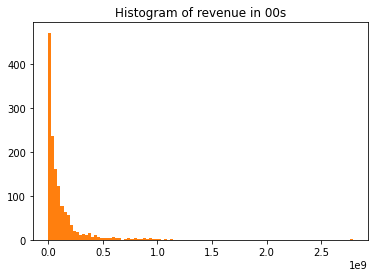

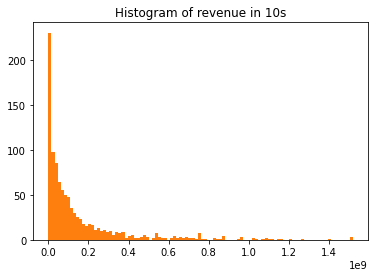

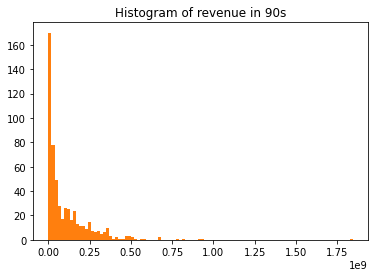

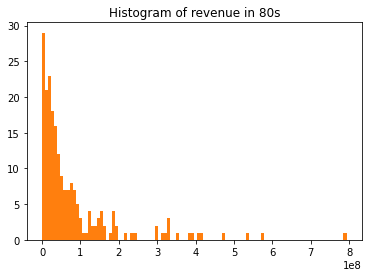

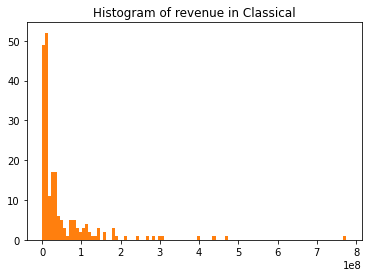

In [ ]:
decade_list = df_release_rev["decade"].unique()
for dec in decade_list:
    plt.hist(df_release_rev[df_release_rev["decade"]==dec]["revenue"],100, color="C1",align='mid')
    plt.title("Histogram of revenue in "+dec)
    plt.show()

> In a common sense, the revenue in 60s-80s is much less than the revenue in 2000s or 2010s due to the inflation. Apparently, the revenue as show in above plot indicate that the revenue of the later 90s movies are 10 times higher than the before (1e9 as comparing to 1e8)

**However, we have to conduct ANOVA test and pairwise test further before concluding that** 
>the analysis on revenue with respect to season, week of year and day of week should be grouped in **specific decades**

In [ ]:
# decade_list = df_release_rev["decade"].unique()
# for dec in decade_list:
#     plt.hist(df_release_rev[df_release_rev["decade"]==dec]["revenue"],100, color="C1",align='mid')
#     plt.title("Histogram of revenue in "+dec)
#     plt.show()
    
model_decade_revenue = ols('revenue_transform ~ decade',                 # Model formula check the influence of genre group on revenue
            data = df_release_rev).fit()
anova_result_rev_dec = sm.stats.anova_lm(model_decade_revenue, typ=2)
print(anova_result_rev_dec)

pair_t_score = model_decade_revenue.t_test_pairwise('decade')
pair_t_score.result_frame

               sum_sq      df          F        PR(>F)
decade      59.389656     4.0  14.918259  4.337223e-12
Residual  3354.991416  3371.0        NaN           NaN


,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
10s-00s,0.113791,0.041276,2.756842,5.867676e-03,0.032863,0.194720,2.899610e-02,True
80s-00s,-0.109681,0.073836,-1.485468,1.375133e-01,-0.254448,0.035087,3.584105e-01,False
90s-00s,-0.029526,0.049928,-0.591365,5.543156e-01,-0.127419,0.068367,5.543156e-01,False
Classical-00s,-0.459493,0.074456,-6.171320,7.577247e-10,-0.605478,-0.313509,6.819523e-09,True
80s-10s,-0.223472,0.075701,-2.952051,3.178490e-03,-0.371896,-0.075048,1.892004e-02,True
90s-10s,-0.143317,0.052647,-2.722232,6.517612e-03,-0.246540,-0.040094,2.899610e-02,True
Classical-10s,-0.573285,0.076306,-7.512974,7.361748e-14,-0.722896,-0.423674,7.360779e-13,True
90s-80s,0.080155,0.080745,0.992694,3.209303e-01,-0.078159,0.238468,5.388643e-01,False
Classical-80s,-0.349813,0.097829,-3.575741,3.541401e-04,-0.541624,-0.158002,2.476349e-03,True
Classical-90s,-0.429968,0.081313,-5.287839,1.316514e-07,-0.589395,-0.270541,1.053211e-06,True


According to the ANOVA test and pairwise test on the revenue accross different decades, **it is indicated that the revenue yields differently throughout decades**.

Pairwise test also suggest to group the range of decades into the following groups **"Classical" , "80s-00s", "10s"**. Therefore we can reduce the decades range **from 5 groups to only 3 groups**

**Examine the  effect of Season with respect to different decade**

In [ ]:
decade_list = [["Classical"],["00s","80s","90s"],["10s"]]

  ==================== Analysis on ['Classical'] movies =================


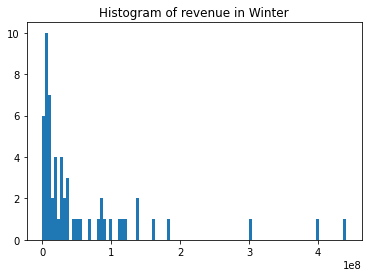

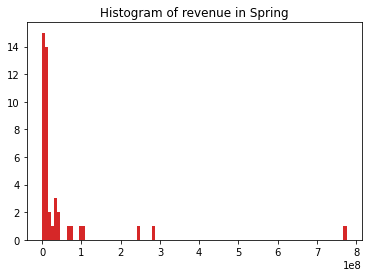

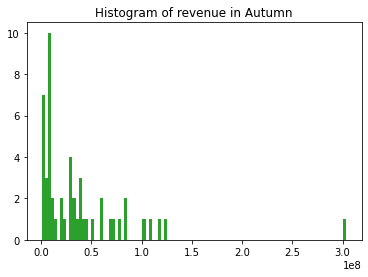

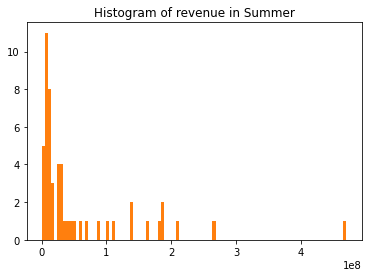

      season      revenue
409   Winter   37823676.0
813   Winter  300218018.0
862   Summer    9250000.0
1108  Winter   84300000.0
1125  Summer   71000000.0
  ==================== Analysis on ['00s', '80s', '90s'] movies =================


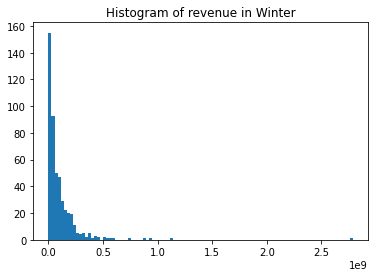

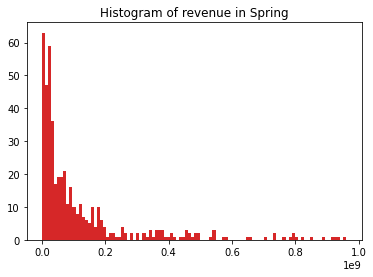

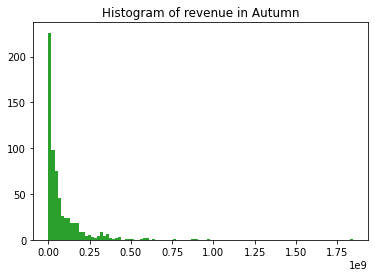

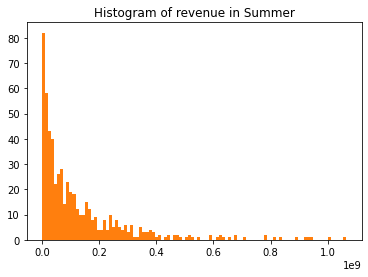

    season       revenue
0   Winter  2.787965e+09
1   Spring  9.610000e+08
5   Spring  8.908716e+08
8   Summer  9.339592e+08
10  Summer  3.910812e+08
  ==================== Analysis on ['10s'] movies =================


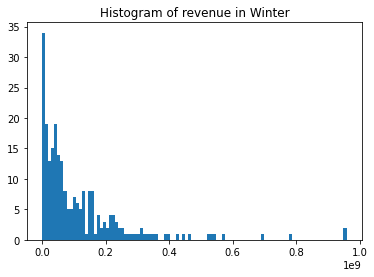

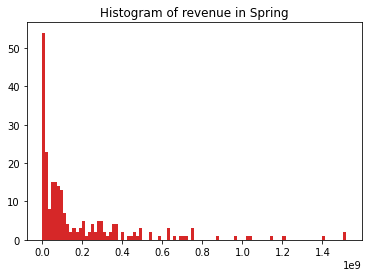

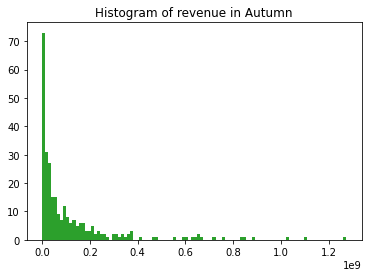

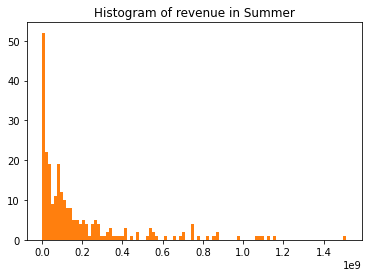

   season       revenue
2  Autumn  8.806746e+08
3  Summer  1.084939e+09
4  Spring  2.841391e+08
6  Autumn  5.917949e+08
7  Spring  1.405404e+09


In [ ]:
for dec in decade_list:
    print("  ==================== Analysis on "+str(dec)+" movies =================")
    df_dec_season = df_release_rev[df_release_rev["decade"].isin(dec)][["season","revenue"]]
    color_map = ['C'+str(x) for x in range(len(season_list))]
    color_index = 0
    for season in season_list:
        plt.hist(df_dec_season[df_dec_season["season"]==season]["revenue"],100, color=color_map[color_index],align='mid')
        plt.title("Histogram of revenue in "+season)
        plt.show()
        color_index = color_index-1
    print(df_dec_season.head(5))

  ==================== Analysis on ['Classical'] movies =================


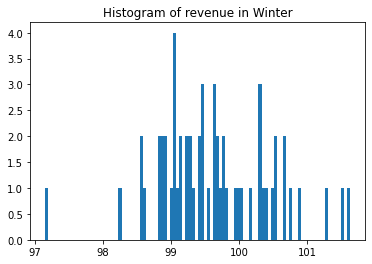

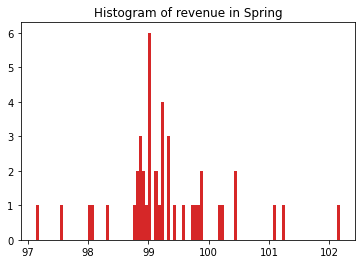

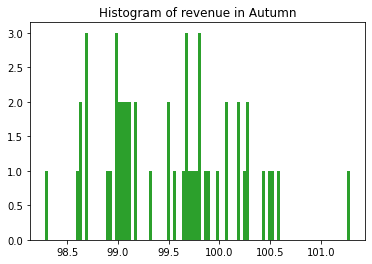

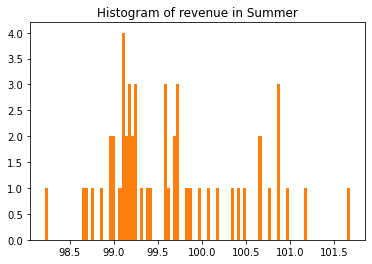

      season  revenue_transform
409   Winter          99.805250
813   Winter         101.273139
862   Summer          99.107205
1108  Winter         100.301300
1125  Summer         100.188127
  ==================== Analysis on ['00s', '80s', '90s'] movies =================


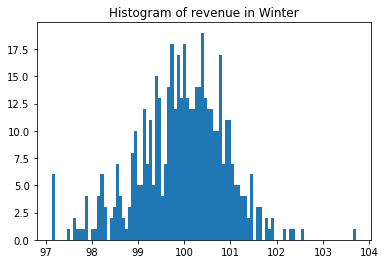

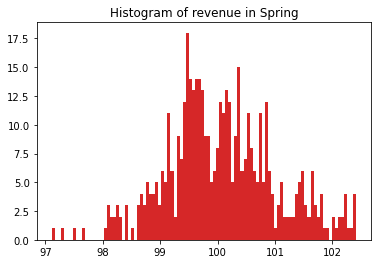

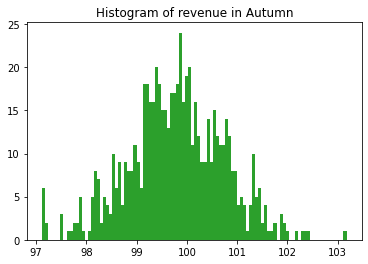

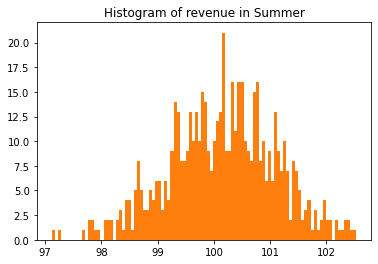

    season  revenue_transform
0   Winter         103.719875
1   Spring         102.412462
5   Spring         102.329785
8   Summer         102.381170
10  Summer         101.508944
  ==================== Analysis on ['10s'] movies =================


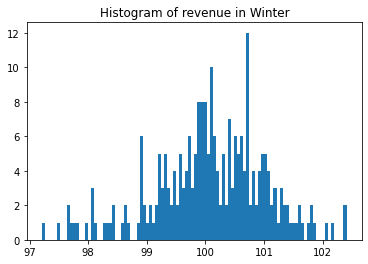

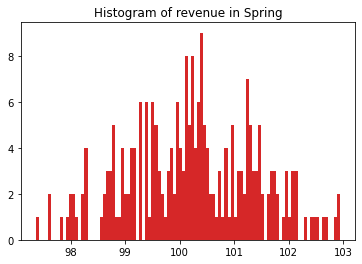

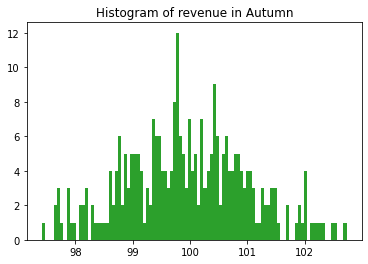

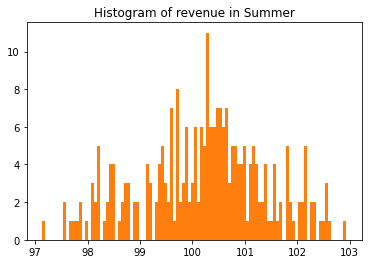

   season  revenue_transform
2  Autumn         102.317335
3  Summer         102.547494
4  Spring         101.225621
6  Autumn         101.904808
7  Spring         102.846950


In [ ]:
for dec in decade_list:
    print("  ==================== Analysis on "+str(dec)+" movies =================")
    df_dec_season = df_release_rev[df_release_rev["decade"].isin(dec)][["season","revenue_transform"]]
    color_map = ['C'+str(x) for x in range(len(season_list))]
    color_index = 0
    for season in season_list:
        plt.hist(df_dec_season[df_dec_season["season"]==season]["revenue_transform"],100, color=color_map[color_index],align='mid')
        plt.title("Histogram of revenue in "+season)
        plt.show()
        color_index = color_index-1
    print(df_dec_season.head(5))

  ==================== Analysis on ['Classical'] movies =================
Mean of Winter =  99.6222313690461
Mean of Spring =  99.48650349916444
Mean of Autumn =  99.4973581072663
Mean of Summer =  99.53650892691378


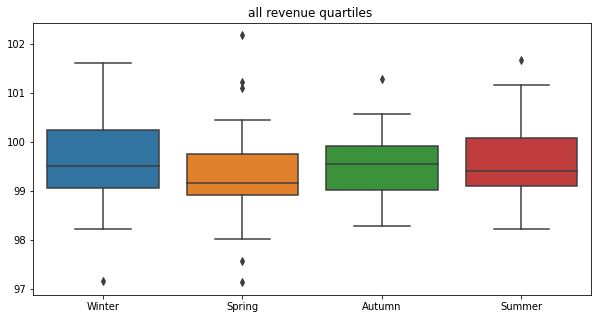

  ==================== Analysis on ['00s', '80s', '90s'] movies =================
Mean of Winter =  99.9537583907446
Mean of Spring =  100.00672705768454
Mean of Autumn =  99.91641636424781
Mean of Summer =  99.97774856061385


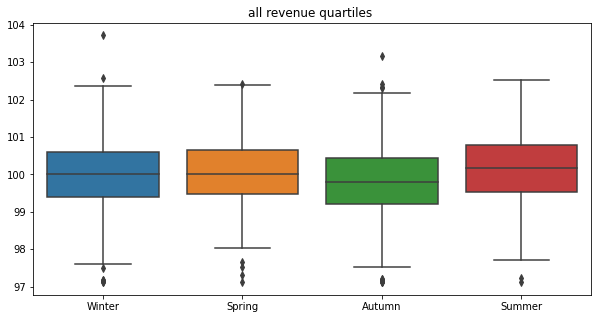

  ==================== Analysis on ['10s'] movies =================
Mean of Winter =  100.07656404143187
Mean of Spring =  100.15164127109557
Mean of Autumn =  100.07309797459205
Mean of Summer =  100.10979376892331


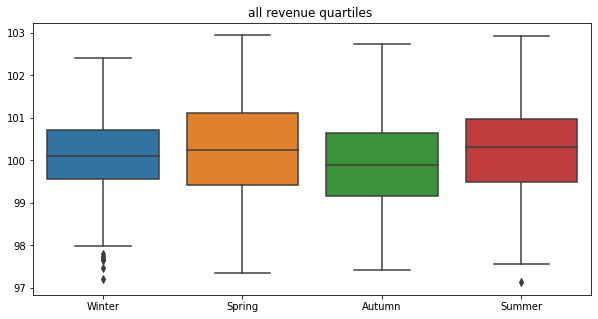

In [ ]:
for dec in decade_list:
    print("  ==================== Analysis on "+str(dec)+" movies =================")
    df_dec_season = df_release_rev[df_release_rev["decade"].isin(dec)][["season","revenue_transform"]]
    color_map = ['C'+str(x) for x in range(len(DoW))]
    color_index = 0
    season_list_all_quartile = []
    revenue_list_all_quartile = []
    for season in season_list:
        df_dec_season_revenue = df_dec_season[df_dec_season["season"]==season]["revenue_transform"]
        season_list_all_quartile = season_list_all_quartile+[season]*len(df_dec_season_revenue)
        revenue_list_all_quartile = revenue_list_all_quartile + df_dec_season_revenue.tolist()
        
        print("Mean of "+season+" = ",np.mean(revenue_list_all_quartile))
        color_index = color_index-1

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x= season_list_all_quartile,y=revenue_list_all_quartile).set_title('all revenue quartiles ')
    plt.show()

In [ ]:
for dec in decade_list:
    print("  ==================== Analysis on "+str(dec)+" movies =================")
    df_dec_season = df_release_rev[df_release_rev["decade"].isin(dec)][["season","revenue_transform"]]

    model_season_revenue = ols('revenue_transform ~ season',                 # Model formula check the influence of genre group on revenue
                data = df_dec_season).fit()
    anova_result_rev_dec = sm.stats.anova_lm(model_season_revenue, typ=2)
    print(anova_result_rev_dec)

#     pair_t_score = model_season_revenue.t_test_pairwise('season')
#     print(pair_t_score.result_frame)
    
    tukey = pairwise_tukeyhsd(df_release_rev['revenue_transform'], df_release_rev['season'],alpha=0.05) 
    print(tukey.summary())

  ==================== Analysis on ['Classical'] movies =================
              sum_sq     df         F    PR(>F)
season      3.424499    3.0  1.859688  0.137627
Residual  123.990149  202.0       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Autumn Spring   0.2541  0.001   0.129  0.3791   True
Autumn Summer   0.3232  0.001  0.2039  0.4425   True
Autumn Winter   0.1513 0.0087  0.0282  0.2744   True
Spring Summer   0.0691 0.5072 -0.0591  0.1973  False
Spring Winter  -0.1028 0.1858 -0.2345  0.0289  False
Summer Winter  -0.1719 0.0027 -0.2982 -0.0457   True
----------------------------------------------------
  ==================== Analysis on ['00s', '80s', '90s'] movies =================
               sum_sq      df          F        PR(>F)
season      44.407350     3.0  16.264998  1.871404e-10
Residual  1967.593035  2162.0        NaN           NaN
Multi

## Remarks

#### The test results have indicated the following

*1) The revenue in Spring and Summer are resemble, while the revenue in Autumn and Winter are resemble*

*2) The revenue between 2 halves of the movie season are different.*

*3) The first half of the movie season yield higher revenue - to be specific* ***Autumn < Winter < Summer < Spring***

*4) The trend is almost preserved accross groups of decades*


  ==================== Analysis on ['Classical'] movies =================
0


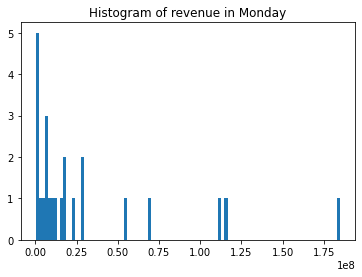

1


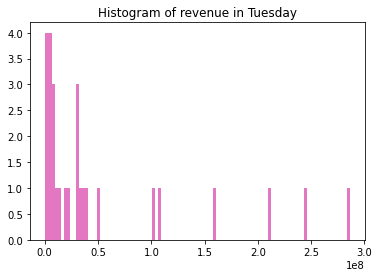

2


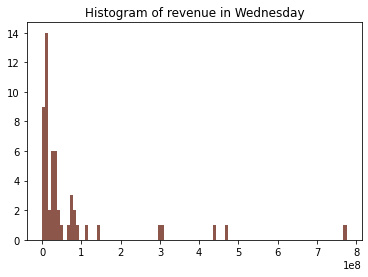

3


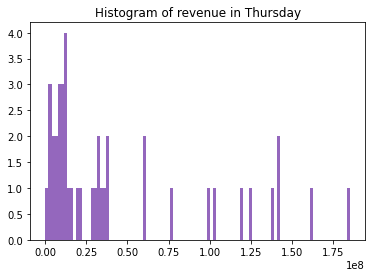

4


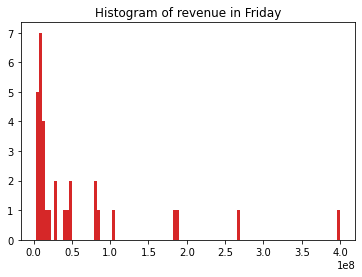

5


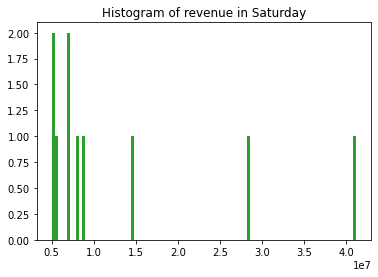

6


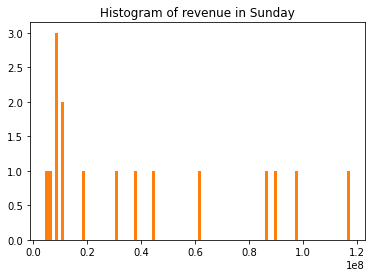

  ==================== Analysis on ['00s', '80s', '90s'] movies =================
0


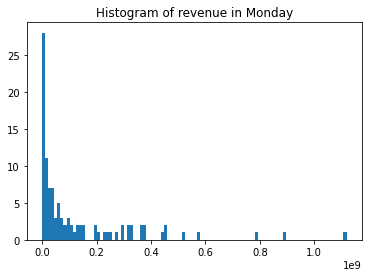

1


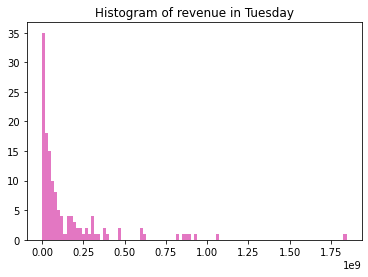

2


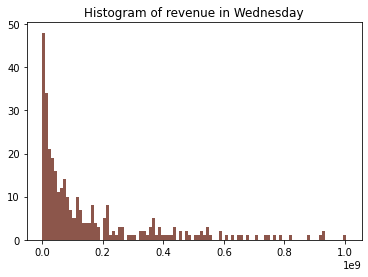

3


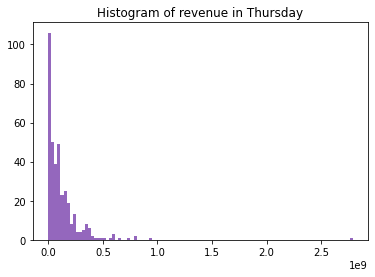

4


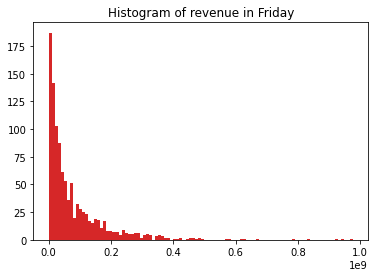

5


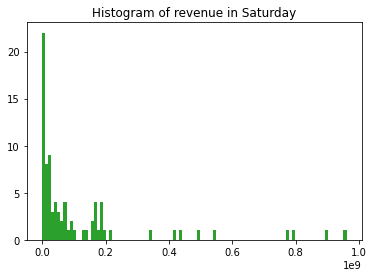

6


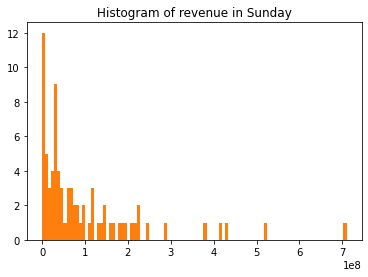

  ==================== Analysis on ['10s'] movies =================
0


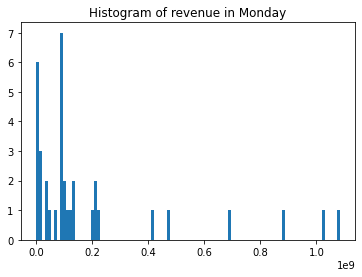

1


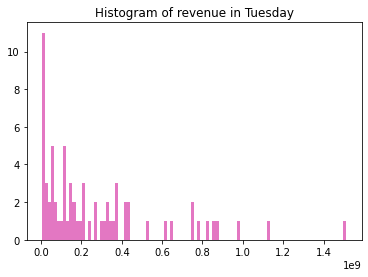

2


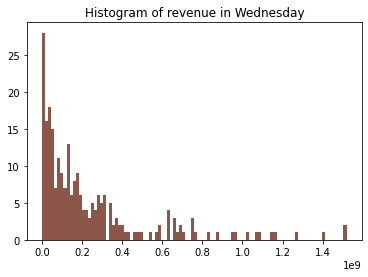

3


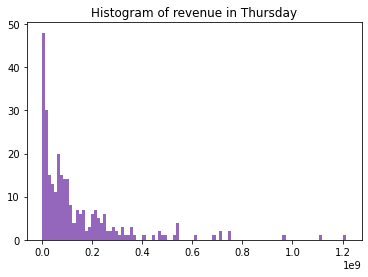

4


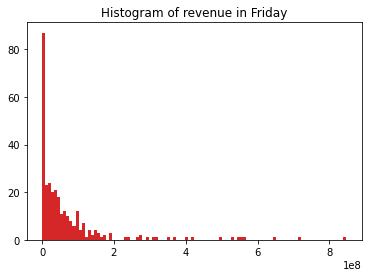

5


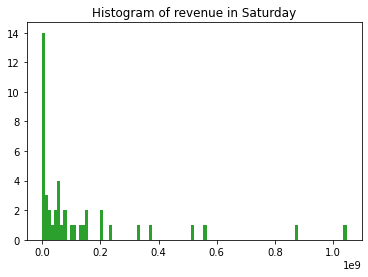

6


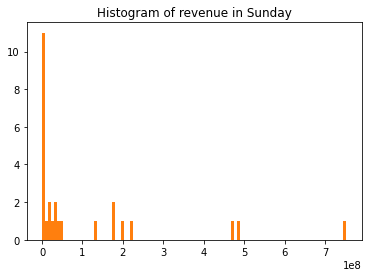

In [ ]:
day_dictionary ={
    6:"Sunday",
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday"
}
for dec in decade_list:
    print("  ==================== Analysis on "+str(dec)+" movies =================")
    df_dec_DoW = df_release_rev[df_release_rev["decade"].isin(dec)][["DoW","revenue"]]
    color_map = ['C'+str(x) for x in range(len(DoW))]
    color_index = 0
    for day in DoW:
        print(day)
        plt.hist(df_dec_DoW[df_dec_DoW["DoW"]==day]["revenue"],100, color=color_map[color_index],align='mid')
        plt.title("Histogram of revenue in "+day_dictionary.get(day))
        plt.show()
        color_index = color_index-1

  ==================== Analysis on ['Classical'] movies =================
Monday


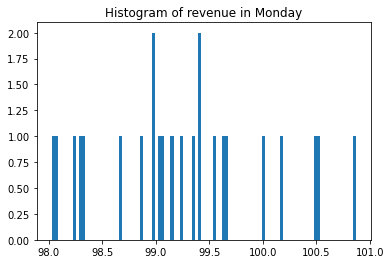

Tuesday


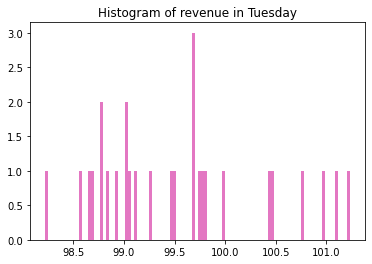

Wednesday


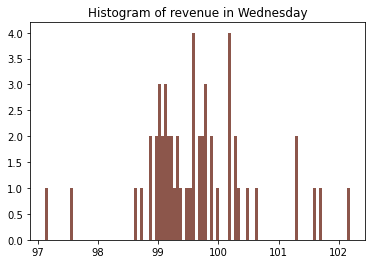

Thursday


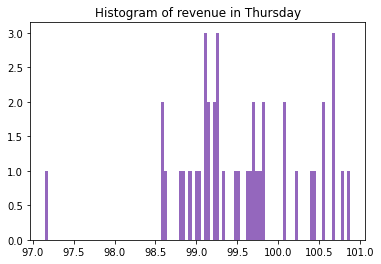

Friday


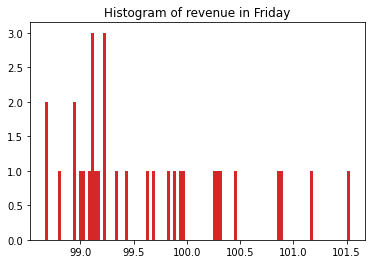

Saturday


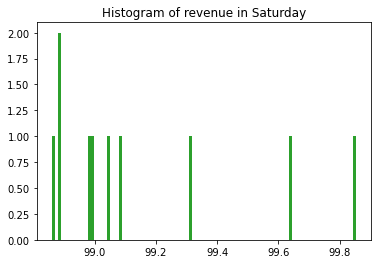

Sunday


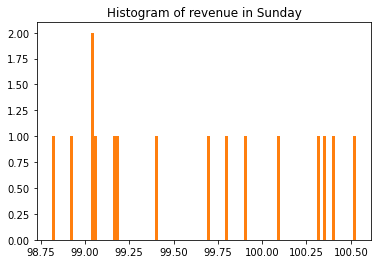

  ==================== Analysis on ['00s', '80s', '90s'] movies =================
Monday


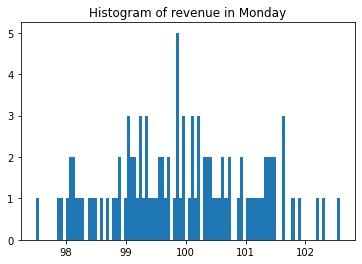

Tuesday


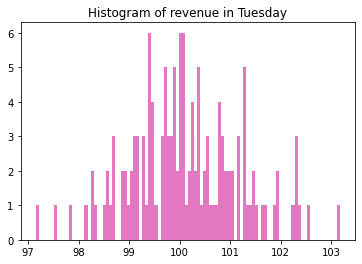

Wednesday


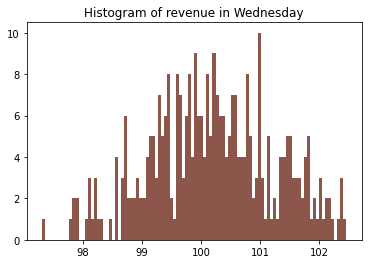

Thursday


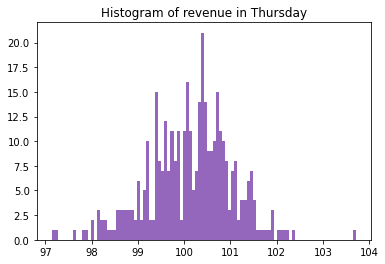

Friday


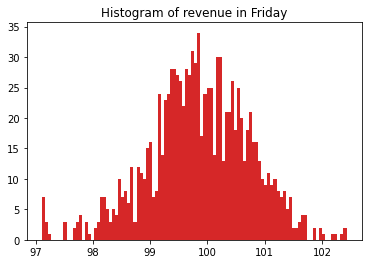

Saturday


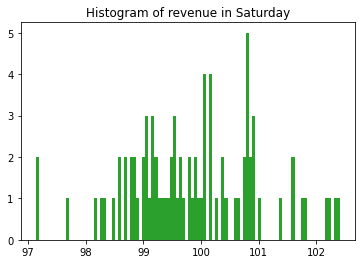

Sunday


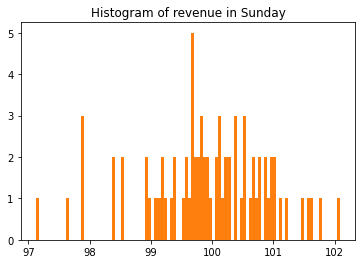

  ==================== Analysis on ['10s'] movies =================
Monday


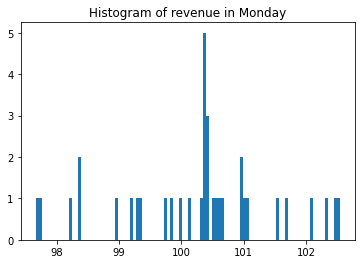

Tuesday


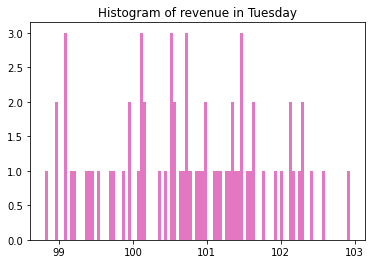

Wednesday


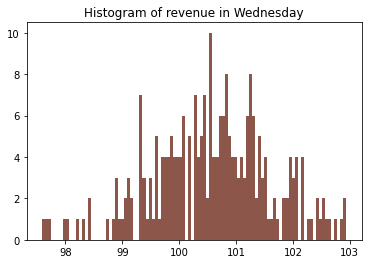

Thursday


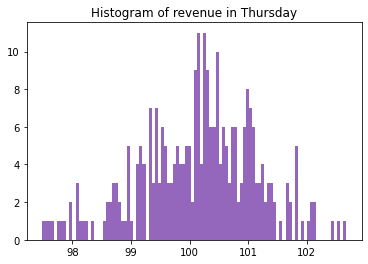

Friday


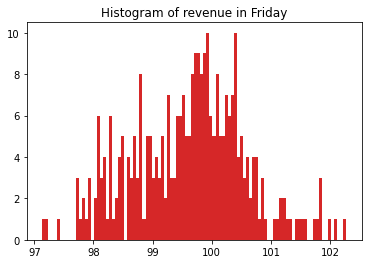

Saturday


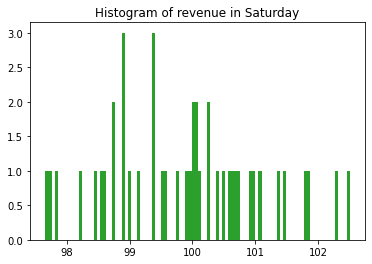

Sunday


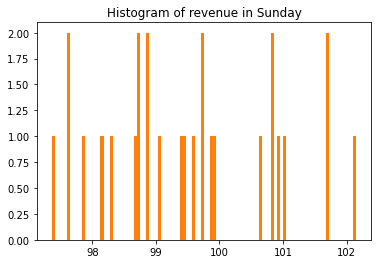

In [ ]:
for dec in decade_list:
    print("  ==================== Analysis on "+str(dec)+" movies =================")
    df_dec_DoW = df_release_rev[df_release_rev["decade"].isin(dec)][["DoW","revenue_transform"]]
    color_map = ['C'+str(x) for x in range(len(DoW))]
    color_index = 0
    for day in DoW:
        print(day_dictionary.get(day))
        plt.hist(df_dec_DoW[df_dec_DoW["DoW"]==day]["revenue_transform"],100, color=color_map[color_index],align='mid')
        plt.title("Histogram of revenue in "+day_dictionary.get(day))
        plt.show()
        color_index = color_index-1

  ==================== Analysis on ['Classical'] movies =================
Mean of revenue on Monday =  30529460.791666668
Mean of revenue on Tuesday =  42485505.384615384
Mean of revenue on Wednesday =  56695758.18867925
Mean of revenue on Thursday =  53340852.222972974
Mean of revenue on Friday =  53811941.983333334
Mean of revenue on Saturday =  51665286.29473684
Mean of revenue on Sunday =  50755787.558252424


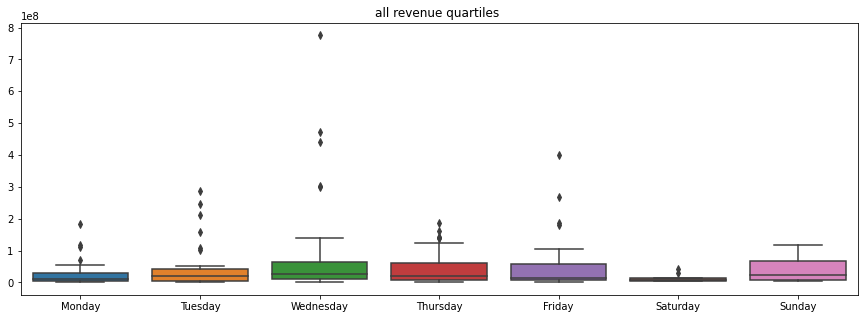

  ==================== Analysis on ['00s', '80s', '90s'] movies =================
Mean of revenue on Monday =  128809030.21359223
Mean of revenue on Tuesday =  142481866.0251046
Mean of revenue on Wednesday =  148537407.96263346
Mean of revenue on Thursday =  138327713.42475986
Mean of revenue on Friday =  108437581.82643391
Mean of revenue on Saturday =  108844786.56800766
Mean of revenue on Sunday =  108433418.27331486


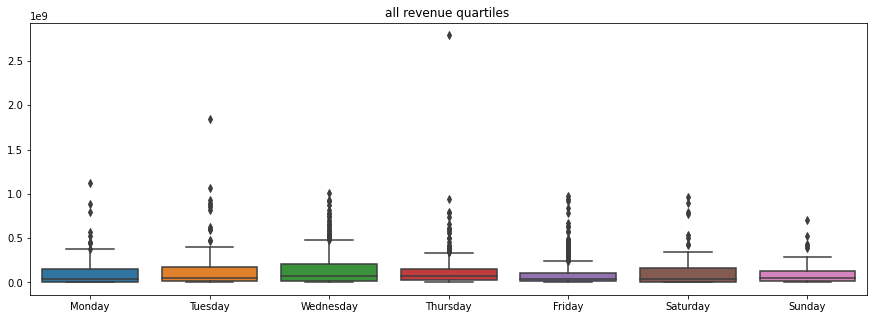

  ==================== Analysis on ['10s'] movies =================
Mean of revenue on Monday =  195883122.7777778
Mean of revenue on Tuesday =  250367611.2761905
Mean of revenue on Wednesday =  238322395.44508672
Mean of revenue on Thursday =  191254622.56031746
Mean of revenue on Friday =  151184652.81886387
Mean of revenue on Saturday =  150370302.0
Mean of revenue on Sunday =  149178656.60059762


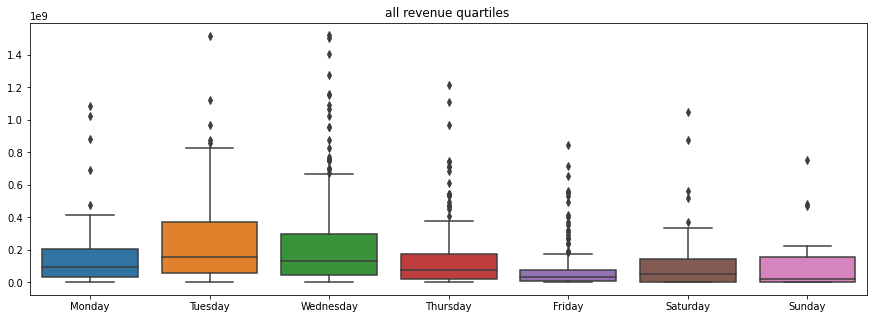

In [ ]:
for dec in decade_list:
    print("  ==================== Analysis on "+str(dec)+" movies =================")
    df_dec_DoW = df_release_rev[df_release_rev["decade"].isin(dec)][["DoW","revenue"]]
    color_map = ['C'+str(x) for x in range(len(DoW))]
    color_index = 0
    DoW_list_all_quartile = []
    revenue_list_all_quartile = []
    for day in DoW:
        df_dec_DoW_revenue = df_dec_DoW[df_dec_DoW["DoW"]==day]["revenue"]
        DoW_list_all_quartile = DoW_list_all_quartile+[day_dictionary.get(day)]*len(df_dec_DoW_revenue)
        revenue_list_all_quartile = revenue_list_all_quartile + df_dec_DoW_revenue.tolist()
        color_index = color_index-1
        print("Mean of revenue on "+day_dictionary.get(day)+ " = ",np.mean(revenue_list_all_quartile))
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.boxplot(x= DoW_list_all_quartile,y=revenue_list_all_quartile).set_title('all revenue quartiles ')
    plt.show()

In [ ]:
model_DoW_revenue.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                  Adj. R-squared:         -0.004    
Dependent Variable:      revenue              AIC:                    8134.2129 
Date:                    2020-10-02 16:30     BIC:                    8140.8687 
No. Observations:        206                  Log-Likelihood:         -4065.1   
Df Model:                1                    F-statistic:            0.1455    
Df Residuals:            204                  Prob (F-statistic):     0.703     
R-squared:               0.001                Scale:                  8.1674e+15
--------------------------------------------------------------------------------
              Coef.        Std.Err.      t    P>|t|      [0.025        0.975]   
--------------------------------------------------------------------------------
Intercept 54528058.2947 11723983.9198  4.6510 0.0000 31412337.7310 77643778.8584
DoW       -1449790.6189  3800850.5079 -0.3814 0.7033 -8943778.9122  6044197.6745
--------------------------------------------------------------------------------
Omnibus:                  215.503           Durbin-Watson:              1.568   
Prob(Omnibus):            0.000             Jarque-Bera (JB):           5465.789
Skew:                     4.203             Prob(JB):                   0.000   
Kurtosis:                 26.793            Condition No.:              6       
================================================================================

"""

In [ ]:
for dec in decade_list:
    print("  ==================== Analysis on "+str(dec)+" movies =================")
    df_dec_DoW = df_release_rev[df_release_rev["decade"].isin(dec)][["DoW","revenue_transform","revenue"]]    
    model_DoW_revenue = ols('revenue ~ DoW',                 # Model formula check the influence of genre group on revenue
                data = df_dec_DoW).fit()
    anova_result_rev_DoW = sm.stats.anova_lm(model_DoW_revenue, typ=2)
    print(anova_result_rev_DoW)

#     pair_t_score = model_DoW_revenue.t_test_pairwise('DoW')
#     print(pair_t_score.result_frame)
    
    tukey = pairwise_tukeyhsd(df_dec_DoW['revenue_transform'], df_dec_DoW['DoW'],alpha=0.05) 
    print(tukey.summary())

  ==================== Analysis on ['Classical'] movies =================
                sum_sq     df         F    PR(>F)
DoW       1.188325e+15    1.0  0.145495  0.703275
Residual  1.666158e+18  204.0       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1    0.292 0.8135 -0.3597 0.9437  False
     0      2   0.3867 0.4176  -0.188 0.9614  False
     0      3     0.31 0.6938 -0.2895 0.9094  False
     0      4   0.3716 0.5718  -0.261 1.0043  False
     0      5  -0.0973    0.9 -0.9791 0.7845  False
     0      6   0.3564 0.7732 -0.3997 1.1125  False
     1      2   0.0947    0.9 -0.4509 0.6403  False
     1      3    0.018    0.9 -0.5536 0.5895  False
     1      4   0.0796    0.9 -0.5266 0.6859  False
     1      5  -0.3893 0.8083 -1.2524 0.4737  False
     1      6   0.0644    0.9 -0.6698 0.7986  False
     2      3  -0.0767    0.9 -0.5587 0.4053  Fa

## Remarks

1) The above test indicate that the release day of the week does not effect the revenue in the old times movies (from 2000s backward)

2) However, the release day reflects the revenue for modern movies. In particular, movies release in **the later half of the week yielded more revenue than the first half, especially on *Wednesday.** And then the revenue drops gradually after that. *The result also suggest **NOT** to release movies on Monday and Tuesday as the revenue are the least*